# Team Effectiveness Home Vs. Away - Kang, Stephanie, Marcus, Bill, Steven, Keane

---

## Executive Summary - Final

---

This analysis aimed to quantify the impact of home-court advantage in the NBA using play-by-play and shot-detail data. The findings indicate that while home-court advantage exists, its effects are subtle and not consistently overwhelming across all aspects of the game.

**Key Findings:**

*   **Shot Efficiency:** Home teams show a slight edge in shooting efficiency, particularly for shots at the rim and three-pointers. However, mid-range shooting efficiency remains largely unaffected by venue. Layups consistently stand out as the most efficient shot type for both home and away teams.
*   **Shot Mix Strategy:** Teams maintain a remarkably consistent shot mix (2PT vs. 3PT attempts) throughout the regulation quarters, regardless of playing at home or away. A minor shift towards more three-pointers is observed in the final two minutes of each period, including overtime, but this adjustment is league-wide rather than venue-specific. The only notable difference is in overtime, where away teams tend to favor two-pointers more than home teams.
*   **Substitution Patterns:** Substitution patterns are predictable and primarily driven by standard rotation practices, with clusters of substitutions occurring mid-quarter and at the end of quarters. These patterns are consistent across home and away games.
*   **Free Throw Performance:** Overall free throw success rates are very similar for home and away teams. While there are minor fluctuations by quarter and free throw attempt sequence (e.g., 1 of 2, 2 of 2), there is no strong evidence of a systematic home-court bias in free throw accuracy.
*   **Scoring Runs and Momentum:** The analysis of scoring runs reveals that both home and away teams produce long scoring streaks at similar rates. The distribution of these long runs across quarters is also comparable, suggesting that significant momentum shifts can happen at any point in the game, regardless of venue.
*   **Overall Scoring and Win Rate:** On average, home teams score slightly more points per game and have a slightly higher win percentage (50.5%) compared to away teams. This reinforces the existence of a home-court advantage, though the average scoring margin is small.
*   **Turnover Differential:** The average turnover differential varies by team, with some teams committing more turnovers at home and others fewer. This suggests that the impact of venue on turnovers is team-specific rather than a league-wide phenomenon.

## The Business Problem Definition + Brief Description of Data + Motivation

---

The objective of this project is to analyze NBA play-by-play and shot-detail data to uncover how team performance differs in home versus away games. By examining scoring runs, substitution patterns, shot success rates, and defensive effectiveness, we aim to reveal insights about game momentum, strategy adjustments, and overall team efficiency in different environments. This project will help us understand whether "home-court advantage" is driven by better shooting, smarter rotations, or defensive intensity

This project offers our group hands-on experience with real sports analytics — one of the fastest-growing fields in data science. By exploring team performance in home versus away games, we can uncover valuable insights into what drives success in professional basketball. For teams, coaches, and analysts, understanding these trends can improve decision-making around rotations, defensive matchups, and in-game adjustments. This analysis not only helps quantify the impact of home-court advantage but also builds our skills in data cleaning, exploratory analysis, and statistical modeling — directly applicable to careers in sports analytics, performance optimization, and data-driven decision-making.

NBA and WNBA dataset is a large-scale play-by-play and shot-detail dataset covering both NBA and WNBA games, collected from multiple public sources (e.g., official league APIs and stats sites). It provides every in-game event—from period starts, jump balls, fouls, turnovers, rebounds, and field-goal attempts through free throws—along with detailed shot metadata (shot location, distance, result, assisting player, etc.)

https://www.kaggle.com/datasets/brains14482/nba-playbyplay-and-shotdetails-data-19962021?select=matchups_2024.csv



**Cdnnba Data**

| Data                      | Data_type |
|---------------------------|-----------|
| actionNumber              | int64     |
| clock                     | object    |
| timeActual                | object    |
| period                    | int64     |
| periodType                | object    |
| actionType                | object    |
| subType                   | object    |
| qualifiers                | object    |
| personId                  | int64     |
| x                         | float64   |
| y                         | float64   |
| possession                | int64     |
| scoreHome                 | int64     |
| scoreAway                 | int64     |
| ...        | ...   |
| gameId                    | int64     |


**Matchups**

| Data                              | Data_type |
|-----------------------------------|-----------|
| game_id                           | int64     |
| away_team_id                      | int64     |
| home_team_id                      | int64     |
| team_id                           | int64     |
| team_name                         | object    |
| team_city                         | object    |
| team_tricode                      | object    |
| team_slug                         | object    |
| person_id                         | int64     |
| first_name                        | object    |
| family_name                       | object    |
| name_i                            | object    |
| ...                     | ...     |
| shooting_fouls                    | int64     |

## Summary of Team Assignment Phase - 5

---

This analysis finds that home-court advantage is real but modest. The clearest home field effects are slightly better finishing at the rim and marginally higher 3PT efficiency, while mid-range shooting, overall shot selection, substitutions, and free-throw performance remain largely venue-neutral.

Quarter-by-quarter strategy is steady for both sides; the main situational wrinkle appears in overtime, where away teams lean a bit more toward 2PT while home teams remain closer to their regulation mix. In short, venue nudges outcomes, but it doesn’t overhaul how teams play.

Wins are more likely to come from creating high-value shots (rim pressure, quality threes) and timely, opponent-specific adjustments than from relying on venue effects. Keep rotations disciplined around natural stoppages (start/end of quarters), and on the road in late/OT scenarios, simplify to higher-probability looks and emphasize execution over scheme complexity.

Next steps:

1. Look at contest quality, matchup data, foul pressure to separate shot making from shot quality.

2. Quantify run dynamics and link them to rotation choices to test whether targeted substitution tweaks can slow opponent momentum, especially if the team is away.

3. Incorporate opponent/style controls (pace, rim deterrence, switching) and travel/rest factors to isolate venue from confounders.

Bottom line: Home helps, but edges are small—prioritize sustainable advantages that travel.

### Download Dataset and Import Libraries

This is how we download the dataset from the GitHub repository. From the download, we load our data.

Downloading datases from github

In [125]:
!wget https://github.com/Marcusshi/BA780-07/raw/main/cdnnba_2024.csv.zip -O cdnnba_2024.csv.zip
!wget https://github.com/Marcusshi/BA780-07/raw/main/matchups_2024.csv -O matchups_2024.csv

--2025-10-15 20:22:42--  https://github.com/Marcusshi/BA780-07/raw/main/cdnnba_2024.csv.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Marcusshi/BA780-07/main/cdnnba_2024.csv.zip [following]
--2025-10-15 20:22:42--  https://raw.githubusercontent.com/Marcusshi/BA780-07/main/cdnnba_2024.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31300185 (30M) [application/zip]
Saving to: ‘cdnnba_2024.csv.zip’

cdnnba_2024.csv.zip 100%[===================>]  29.85M  --.-KB/s    in 0.1s    

2025-10-15 20:22:43 (220 MB/s) - ‘cdnnba_2024.csv.zip’ saved [31300185/31300185]

--2025-10-15 20:22:43--  

We downloaded the `cdnnba_2024.csv.zip` dataset directly from GitHub using the `wget` command and saved it locally.  
This ensures reproducibility and guarantees that everyone can access the same version of the raw data for analysis.


In [126]:
!unzip -o cdnnba_2024.csv.zip -d data

Archive:  cdnnba_2024.csv.zip
  inflating: data/cdnnba_2024.csv    
  inflating: data/__MACOSX/._cdnnba_2024.csv  


We extracted the `cdnnba_2024.csv.zip` file into the `data` directory using the `unzip` command.  
The `-o` flag ensures any existing files are overwritten, guaranteeing we always work with the latest dataset version.  


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch, Rectangle
from io import StringIO
import re

We imported required libraries

In [128]:
cdnnba = pd.read_csv("/content/data/cdnnba_2024.csv")
matchups = pd.read_csv("/content/matchups_2024.csv")
# cdnnba.head(5)
# matchups.head(5)
# print(cdnnba.shape)
# print(matchups.shape)
# cdnnba.info()

We successfully loaded the `cdnnba_2024.csv` dataset into a Pandas DataFrame and displayed the first five rows.  
This confirms the file was read correctly and provides an initial preview of the dataset’s structure and columns for further cleaning and analysis.

### Data Cleaning & EDA Overview

In [129]:
#Marcus

cols_keep_ms = [
    "actionNumber", "gameId", "period",
    "playerName", "personId", "playerNameI",
    "actionType", "subType", "teamTricode",
    "shotResult", "periodType", "pointsTotal"
]


shot_actions = ["2pt", "3pt", "freethrow"]
shots = cdnnba.loc[cdnnba["actionType"].isin(shot_actions), cols_keep_ms].copy()

shots["ms_make"] = shots["shotResult"].astype(str).str.lower().eq("made")

pts_map = {"2pt": 2, "3pt": 3, "freethrow": 1}
shots["ms_points"] = shots["actionType"].map(pts_map).fillna(0)
shots.loc[~shots["ms_make"], "ms_points"] = 0

sub = shots["subType"].astype(str).str.strip()
shots["ms_subtype"] = shots["subType"]
shots.loc[sub.str.contains(r"\bof\b", case=False, regex=True), "ms_subtype"] = "Free Throw"

valid_subtypes = {"Jump Shot", "Layup", "Hook", "Free Throw"}
shots = shots[shots["ms_subtype"].isin(valid_subtypes)].copy()

shots.head(3)

,actionNumber,gameId,period,playerName,personId,playerNameI,actionType,subType,teamTricode,shotResult,periodType,pointsTotal,ms_make,ms_points,ms_subtype
2,7,22400001,1,Risacher,1642258,Z. Risacher,3pt,Jump Shot,ATL,Missed,REGULAR,NaN,False,0,Jump Shot
5,10,22400001,1,Johnson,1630552,J. Johnson,2pt,Jump Shot,ATL,Missed,REGULAR,NaN,False,0,Jump Shot
7,12,22400001,1,White,1628401,D. White,3pt,Jump Shot,BOS,Missed,REGULAR,NaN,False,0,Jump Shot


We cleaned and filtered the play-by-play dataset to keep only real shot attempts (2PT, 3PT, Free Throw).  
Points were assigned consistently (2, 3, or 1) with misses set to zero, and shot subtypes were simplified into five categories: *Jump Shot, Layup, Hook,* and *Free Throw*.  
This creates a clean dataset (`shots`) that is ready for efficiency analysis.  


In [130]:
# required columns for quarter by quarter shot mix strategy
cols_keep_shot_mix = {"gameId","teamTricode","clock","period","orderNumber","actionType","scoreHome","scoreAway"}

# 1) Sort events (time order inside each game)
qs_events = cdnnba.copy()
qs_sort_cols = [c for c in ["gameId","orderNumber"] if c in qs_events.columns]
qs_events = qs_events.sort_values(qs_sort_cols if qs_sort_cols else ["gameId"]).reset_index(drop=True)

# 2) Score increments → who scored? (to infer home/away tricode)
qs_events["qs_d_home"] = qs_events.groupby("gameId")["scoreHome"].diff().fillna(0).clip(lower=0)
qs_events["qs_d_away"] = qs_events.groupby("gameId")["scoreAway"].diff().fillna(0).clip(lower=0)

qs_home_map = (qs_events.loc[qs_events["qs_d_home"]>0]
               .groupby("gameId")["teamTricode"].agg(lambda s: s.mode().iloc[0]))
qs_away_map = (qs_events.loc[qs_events["qs_d_away"]>0]
               .groupby("gameId")["teamTricode"].agg(lambda s: s.mode().iloc[0]))

qs_events["qs_homeTricode"] = qs_events["gameId"].map(qs_home_map)
qs_events["qs_awayTricode"] = qs_events["gameId"].map(qs_away_map)
qs_events["qs_home_away"] = None
qs_events.loc[qs_events["teamTricode"] == qs_events["qs_homeTricode"], "qs_home_away"] = "Home"
qs_events.loc[qs_events["teamTricode"] == qs_events["qs_awayTricode"], "qs_home_away"] = "Away"
qs_events = qs_events[qs_events["qs_home_away"].notna()].copy()   # keep rows confidently tagged

# 3) Quarter label (merge any period >= 5 into OT)
quarter_map = {1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"}
qs_events["qs_quarter"] = qs_events["period"].map(quarter_map).fillna("OT")

# 4) Time cleaning: Last 2 Minutes vs Earlier Window
qs_events["q_sec_remaining"] = pd.to_timedelta(qs_events["clock"], errors="coerce").dt.total_seconds()
qs_events["qs_bucket_last2"] = np.where(
    qs_events["q_sec_remaining"] < 120,
    "Late-2m (all periods)",
    "Not-Late (>=120s)"
)

# 5) Shot attempts (2PT / 3PT). If shotResult exists, require it (prevents phantom rows).
qs_is_2pt = qs_events["actionType"].eq("2pt")
qs_is_3pt = qs_events["actionType"].eq("3pt")
qs_has_result = qs_events["shotResult"].notna() if "shotResult" in qs_events.columns else True
qs_events["qs_is_2pt_attempt"] = (qs_is_2pt & qs_has_result).astype(int)
qs_events["qs_is_3pt_attempt"] = (qs_is_3pt & qs_has_result).astype(int)

# 6) Aggregate to Quarter × Home/Away
qs_mix = (qs_events
          .groupby(["qs_quarter","qs_home_away"], as_index=False)
          .agg(two_pa=("qs_is_2pt_attempt","sum"),
               three_pa=("qs_is_3pt_attempt","sum")))

qs_mix["total_att"] = qs_mix["two_pa"] + qs_mix["three_pa"]
qs_mix["share_3pt"] = qs_mix["three_pa"] / qs_mix["total_att"].replace(0, np.nan)
qs_mix["share_2pt"] = 1 - qs_mix["share_3pt"]

# 7) Aggregate to Last 2 Minutes vs Earlier Window × Quarter × Home/Away
qs_mix_last2 = (qs_events
    .groupby(["qs_quarter","qs_home_away","qs_bucket_last2"], as_index=False)
    .agg(two_pa=("qs_is_2pt_attempt","sum"),
         three_pa=("qs_is_3pt_attempt","sum"))
)
qs_mix_last2["total_att"] = qs_mix_last2["two_pa"] + qs_mix_last2["three_pa"]
qs_mix_last2["share_3pt"] = qs_mix_last2["three_pa"] / qs_mix_last2["total_att"].replace(0, np.nan)
qs_mix_last2["share_2pt"] = 1 - qs_mix_last2["share_3pt"]

# 8) Make a tidy table that includes the time bucket
qs_table_last2 = (qs_mix_last2
    .sort_values(["qs_quarter","qs_home_away","qs_bucket_last2"])
    .loc[:, ["qs_quarter","qs_home_away","qs_bucket_last2",
             "two_pa","three_pa","total_att","share_2pt","share_3pt"]]
)

# 9) Audit
print("qs_mix shape:", qs_mix.shape)
display(qs_mix.sort_values(["qs_quarter","qs_home_away"]).head(3))

print("qs_table_last2 shape:", qs_table_last2.shape)
display(qs_table_last2.head(3))

qs_mix shape: (10, 7)


,qs_quarter,qs_home_away,two_pa,three_pa,total_att,share_3pt,share_2pt
0,OT,Away,344,213,557,0.382406,0.617594
1,OT,Home,317,241,558,0.431900,0.568100
2,Q1,Away,16373,11931,28304,0.421531,0.578469


qs_table_last2 shape: (20, 8)


,qs_quarter,qs_home_away,qs_bucket_last2,two_pa,three_pa,total_att,share_2pt,share_3pt
0,OT,Away,Late-2m (all periods),147,98,245,0.600000,0.400000
1,OT,Away,Not-Late (>=120s),197,115,312,0.631410,0.368590
2,OT,Home,Late-2m (all periods),147,117,264,0.556818,0.443182


We cleaned and prepared the play-by-play to build a quarter-level shot-mix table.

Events were time-ordered, Home/Away was inferred from score increments, and periods were standardized to Q1–Q4 with OT merged.

We kept only true field-goal attempts (actionType ∈ {2pt, 3pt}, requiring `shotResult` when present), then aggregated to Quarter × Home/Away to compute 2PA, 3PA, totals, and 2PT/3PT shares.

This produces a clean, reproducible dataset `qs_mix` ready for the single-figure comparison.

To examine late-period strategy within the same framework, we parsed the game clock into seconds remaining and created a “Last 2 Minutes vs Earlier Window” bucket consistently across regulation and OT. Using the same attempt flags and aggregation logic, we built a companion table `qs_mix_last2` at the granularity Quarter × Home/Away × Time bucket.

This enables a like-for-like comparison of shot mix in the final two minutes versus the rest of each period, and preserves the original definitions while highlighting end-of-quarter shifts

In [131]:
#Steven
df = pd.read_csv("/content/data/cdnnba_2024.csv")

print("Raw shape:", df.shape)
print("Raw columns (sample):", df.columns.tolist()[:25])

subs_cols = [
    "gameId","actionNumber","period","periodType",
    "actionType","subType","teamTricode",
    "clock","scoreHome","scoreAway",
    "playerName","personId","playerNameI","description"
]

missing = [c for c in subs_cols if c not in df.columns]
if missing:
    print("Note: some optional columns missing:", missing)

subs_raw = df[[c for c in subs_cols if c in df.columns]].copy()
print("subs_raw shape:", subs_raw.shape)
print("Missing values before cleaning:")
print(subs_raw.isna().sum())



Raw shape: (686008, 57)
Raw columns (sample): ['actionNumber', 'clock', 'timeActual', 'period', 'periodType', 'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y', 'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber', 'isTargetScoreLastPeriod', 'xLegacy', 'yLegacy', 'isFieldGoal', 'side', 'description', 'personIdsFilter', 'teamId', 'teamTricode']
subs_raw shape: (686008, 14)
Missing values before cleaning:
gameId              0
actionNumber        0
period              0
periodType          0
actionType          0
subType         32178
teamTricode     11198
clock               0
scoreHome           0
scoreAway           0
playerName      47825
personId            0
playerNameI     47825
description         0
dtype: int64


We cleaned and filtered the play-by-play dataset to keep only substitution events, selecting relevant columns such as game ID, period, team, player, clock time, and current score.
This step ensures that the data includes only the information necessary for analyzing when substitutions occur during games.
The resulting dataset (subs_raw) provides a structured foundation for adding time, score, and team context in later analysis.

In [132]:
#Steven
df = pd.read_csv("/content/data/cdnnba_2024.csv")
# Step 1: Select relevant columns for home/away analysis
cols_keep_win = [
    "gameId", "teamTricode", "scoreHome", "scoreAway"
]

nba_clean = df[cols_keep_win].copy()
print("Columns selected:", nba_clean.columns.tolist())

# Step 2: Check for missing or null values
print("\nMissing values before cleaning:")
print(nba_clean.isna().sum())

# Drop rows missing critical scoring data
nba_clean.dropna(subset=["scoreHome", "scoreAway"], inplace=True)

print("\nMissing values after cleaning:")
print(nba_clean.isna().sum())
print("Remaining rows:", len(nba_clean))

# Step 3: Standardize team name variations
# Create a mapping dictionary to unify inconsistent team naming
team_map = {
    "LAL": "Los Angeles Lakers",
    "LA Lakers": "Los Angeles Lakers",
    "Los Angeles Lakers": "Los Angeles Lakers",
    "GSW": "Golden State Warriors",
    "Golden State": "Golden State Warriors",
    "NYK": "New York Knicks",
    "NY Knicks": "New York Knicks",
    # Add other abbreviations or variants as needed
}

nba_clean["teamTricode"] = (
    nba_clean["teamTricode"]
    .astype(str)
    .map(team_map)
    .fillna(nba_clean["teamTricode"])
)

# Step 4: Validate team names and score data
print("\nUnique team identifiers after cleaning:", nba_clean["teamTricode"].nunique())
print("Sample of cleaned records:")
display(nba_clean.head(3))

Columns selected: ['gameId', 'teamTricode', 'scoreHome', 'scoreAway']

Missing values before cleaning:
gameId             0
teamTricode    11198
scoreHome          0
scoreAway          0
dtype: int64

Missing values after cleaning:
gameId             0
teamTricode    11198
scoreHome          0
scoreAway          0
dtype: int64
Remaining rows: 686008

Unique team identifiers after cleaning: 30
Sample of cleaned records:


,gameId,teamTricode,scoreHome,scoreAway
0,22400001,NaN,0,0
1,22400001,ATL,0,0
2,22400001,ATL,0,0


We filtered and cleaned the dataset to include only information relevant to team performance, keeping columns for game ID, team identifiers, and home/away scores. Missing or incomplete score entries were removed to ensure accurate calculation of win percentages. We also standardized team names by mapping abbreviations and variations (e.g., “LAL” and “LA Lakers”) to consistent, official names. This resulted in a clean dataset (nba_clean) that accurately reflects each team’s results and is ready for calculating home and away win rates.

In [133]:
#Keane

nba_k = pd.read_csv("/content/data/cdnnba_2024.csv")
matchups_k = pd.read_csv("/content/matchups_2024.csv")

col_to_keep = ['actionNumber','clock','timeActual','period','periodType','actionType','subType','qualifiers','personId',
              'possession', 'scoreHome', 'scoreAway', 'isFieldGoal', 'side',
       'description', 'teamId', 'teamTricode', 'descriptor',
       'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName',
       'playerNameI', 'area', 'areaDetail',
       'shotDistance', 'shotResult','gameId']

nba_cleaned_k = nba_k[col_to_keep]

# Create a copy of the dataframe `nba` by selecting only the columns we want to keep
nba_cleaned_k = nba_k[col_to_keep].copy()
display(nba_cleaned_k.head(3))

nba_cleaned_k.info()

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,possession,...,descriptor,jumpBallRecoveredName,jumpBallRecoverdPersonId,playerName,playerNameI,area,areaDetail,shotDistance,shotResult,gameId
0,2,PT12M00.00S,2024-11-13T00:10:24.900Z,1,REGULAR,period,start,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22400001
1,4,PT11M58.00S,2024-11-13T00:10:26.800Z,1,REGULAR,jumpball,recovered,NaN,1630811,1610612737,...,startperiod,K. Wallace,1630811.0,Wallace,K. Wallace,NaN,NaN,NaN,NaN,22400001
2,7,PT11M43.00S,2024-11-13T00:10:40Z,1,REGULAR,3pt,Jump Shot,NaN,1642258,1610612737,...,NaN,NaN,NaN,Risacher,Z. Risacher,Above the Break 3,24+ Left Center,26.51,Missed,22400001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686008 entries, 0 to 686007
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   actionNumber              686008 non-null  int64  
 1   clock                     686008 non-null  object 
 2   timeActual                686008 non-null  object 
 3   period                    686008 non-null  int64  
 4   periodType                686008 non-null  object 
 5   actionType                686008 non-null  object 
 6   subType                   653830 non-null  object 
 7   qualifiers                241363 non-null  object 
 8   personId                  686008 non-null  int64  
 9   possession                686008 non-null  int64  
 10  scoreHome                 686008 non-null  int64  
 11  scoreAway                 686008 non-null  int64  
 12  isFieldGoal               686008 non-null  int64  
 13  side                      219529 non-null  o

Loaded the data, then selected which columns to keep for further analysis and dropped those that wouldn't be needed for the questions we want to answer. Next, I created a copy of the DataFrame to avoid overwriting the original dataset. It's important to name the new DataFrame something unique so it doesn't overwrite anyone else's DataFrame. This was one of the challenges of working within our own environments before uploading it to the Colab session.

In [134]:
nba_cleaned_1=nba_cleaned_k[nba_cleaned_k['gameId'] == 22400001]

nba_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 537
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   actionNumber              538 non-null    int64  
 1   clock                     538 non-null    object 
 2   timeActual                538 non-null    object 
 3   period                    538 non-null    int64  
 4   periodType                538 non-null    object 
 5   actionType                538 non-null    object 
 6   subType                   508 non-null    object 
 7   qualifiers                191 non-null    object 
 8   personId                  538 non-null    int64  
 9   possession                538 non-null    int64  
 10  scoreHome                 538 non-null    int64  
 11  scoreAway                 538 non-null    int64  
 12  isFieldGoal               538 non-null    int64  
 13  side                      175 non-null    object 
 14  description    

I filtered the Dataframe down to one game so that I could do some EDA. This allowed me to understand how the data worked and create random visuals to become familiar with the dataset.

In [135]:
# calculate deltas from cumulative scores
nba_cleaned_1["home_delta"] = nba_cleaned_1["scoreHome"].diff().fillna(0).clip(lower=0)
nba_cleaned_1["away_delta"] = nba_cleaned_1["scoreAway"].diff().fillna(0).clip(lower=0)

/tmp/ipython-input-1399886226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_cleaned_1["home_delta"] = nba_cleaned_1["scoreHome"].diff().fillna(0).clip(lower=0)
/tmp/ipython-input-1399886226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_cleaned_1["away_delta"] = nba_cleaned_1["scoreAway"].diff().fillna(0).clip(lower=0)


Here, I created a new column I view the scoring margins per quarter for the first game in the dataset. From this new column, I was able to see scoring runs per quarter to see whether the home team went on more runs or the away team.

#### Challenges

The hardest part of the cleaning process is naming the new dataframe something unique so that we don't overwrite anyone else's DF. This is because we did our work in a separate environment before transferring it here.

### Shot Efficiency Analysis - Marcus

**Question:**  
How do different **action types** (2PT, 3PT, Free Throws) and **shot subtypes** (Jump Shot, Layup, Hook, Dunk, Free Throw) compare in terms of scoring efficiency? Which shot types contribute most effectively to team offense?

/tmp/ipython-input-67015027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_act, y="Action", x="ppa", ax=ax1, palette="Blues_r")
/tmp/ipython-input-67015027.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_sub, y="ms_subtype", x="ppa", ax=ax2, palette="Blues_r")


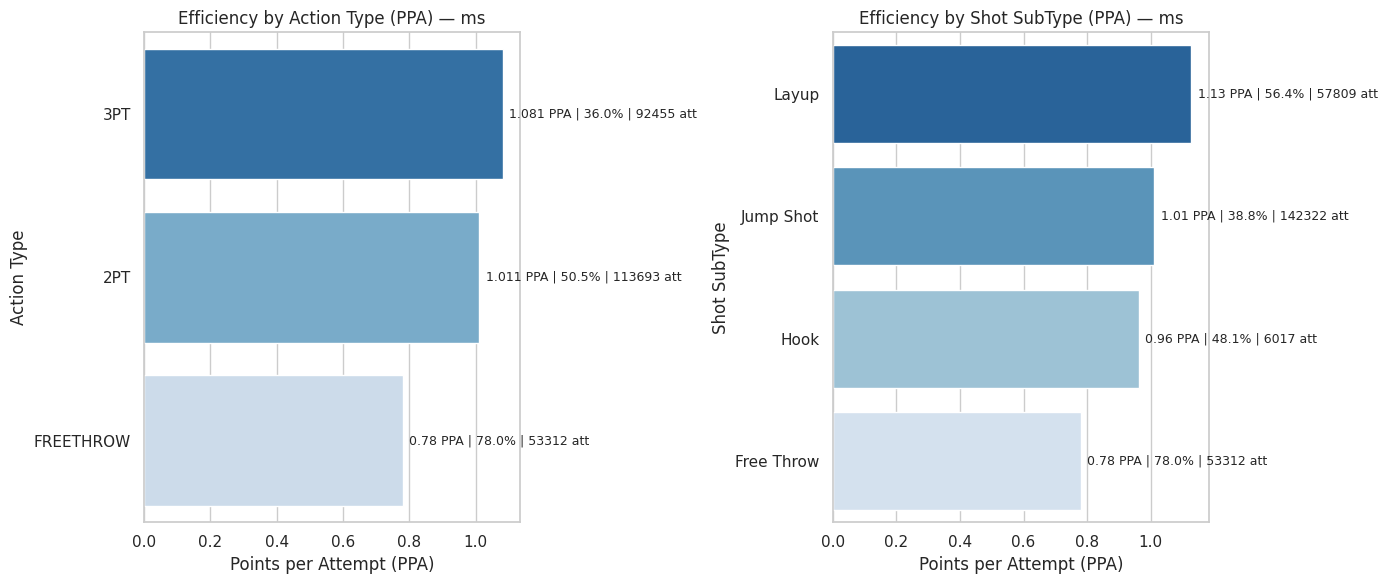

In [136]:
# summaries
summary_act = (
    shots.groupby("actionType", dropna=False)
         .agg(attempts=("ms_make","size"),
              makes=("ms_make","sum"),
              make_rate=("ms_make","mean"),
              ppa=("ms_points","mean"))
         .sort_values(["ppa","make_rate"], ascending=False)
         .reset_index()
)
summary_act["Make %"] = (summary_act["make_rate"]*100).round(1)
summary_act["PPA"] = summary_act["ppa"].round(3)
summary_act["Action"] = summary_act["actionType"].str.upper()

summary_sub = (
    shots.groupby("ms_subtype", dropna=False)
         .agg(attempts=("ms_make","size"),
              makes=("ms_make","sum"),
              make_rate=("ms_make","mean"),
              ppa=("ms_points","mean"))
         .sort_values("ppa", ascending=False)
         .reset_index()
)
summary_sub["Make %"] = (summary_sub["make_rate"]*100).round(1)
summary_sub["PPA"] = summary_sub["ppa"].round(2)

# plotting
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6), sharex=False)

# Action Type
sns.barplot(data=summary_act, y="Action", x="ppa", ax=ax1, palette="Blues_r")
ax1.set_title("Efficiency by Action Type (PPA) — ms")
ax1.set_xlabel("Points per Attempt (PPA)")
ax1.set_ylabel("Action Type")
for i, r in summary_act.iterrows():
    ax1.text(r["ppa"]+0.02, i, f'{r["PPA"]} PPA | {r["Make %"]}% | {int(r["attempts"])} att',
             va="center", fontsize=9)

# SubType
sns.barplot(data=summary_sub, y="ms_subtype", x="ppa", ax=ax2, palette="Blues_r")
ax2.set_title("Efficiency by Shot SubType (PPA) — ms")
ax2.set_xlabel("Points per Attempt (PPA)")
ax2.set_ylabel("Shot SubType")
for i, r in summary_sub.iterrows():
    ax2.text(r["ppa"]+0.02, i, f'{r["PPA"]} PPA | {r["Make %"]}% | {int(r["attempts"])} att',
             va="center", fontsize=9)

plt.tight_layout()
plt.show()

#### Findings

1. **2PT and 3PT shots are nearly equal in overall efficiency**:  


2. **By shot subtype, Layups stand out as the most efficient field attempt**:  
   

3. **Jump Shots are less efficient despite being the most common attempt**:  


### Quarter by Quarter Shot Mix Strategy - Stephanie
**Question:**  
Do teams change their shot mix (2pt vs 3pt) by quarter (Q1–Q4, OT), and does it differ at home vs away, including OT?

**Metric:**  
For each quarter × home/away, count 2PA and 3PA, then show 100% stacked bars (share of 2pt vs 3pt).

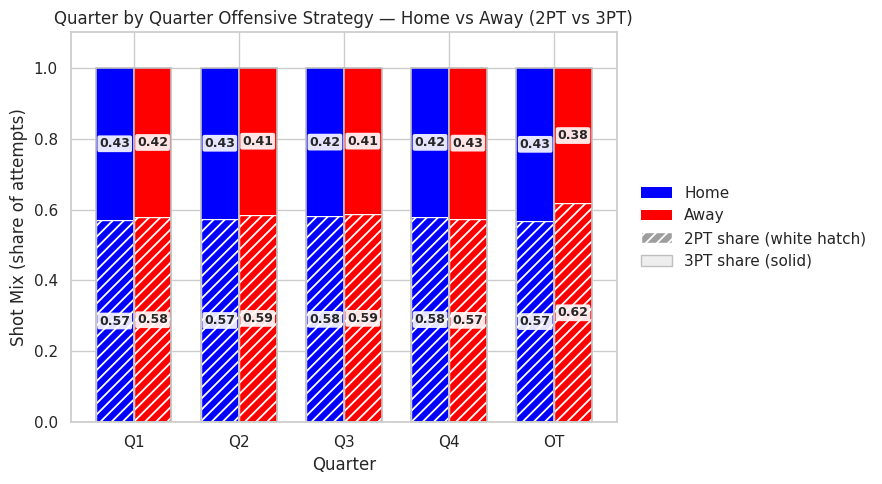

In [137]:
mpl.rcParams['hatch.linewidth'] = 1.3  # a bit thicker so white hatch is clear

# Order quarters on the x-axis (including OT)
qs_order_quarters = ["Q1","Q2","Q3","Q4","OT"]

# Ensure ordering
qs_plot = qs_mix.copy()
qs_plot["qs_quarter"] = pd.Categorical(qs_plot["qs_quarter"], categories=qs_order_quarters, ordered=True)
qs_plot = qs_plot.sort_values(["qs_quarter","qs_home_away"]).reset_index(drop=True)

# Colors fixed by home/away
home_color = "#0000FF"  # blue
away_color = "#FF0000"  # red
edge_gray  = "#bfbfbf"  # light gray outline

# Bar geometry: two bars per quarter (Home left, Away right)
x = np.arange(len(qs_order_quarters))
bar_w = 0.36

def _row(q, ha):
    r = qs_plot[(qs_plot["qs_quarter"]==q) & (qs_plot["qs_home_away"]==ha)]
    return r.iloc[0] if len(r) else None

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(9,5))

for i, q in enumerate(qs_order_quarters):
    for ha, dx, color in [("Home",-bar_w/2,home_color), ("Away",+bar_w/2,away_color)]:
        r = _row(q, ha)
        if r is None:
            continue
        xpos = x[i] + dx
        s2 = float(r["share_2pt"]) if pd.notna(r["share_2pt"]) else 0.0
        s3 = float(r["share_3pt"]) if pd.notna(r["share_3pt"]) else 0.0

        # Bottom = 2PT (WHITE hatch), Top = 3PT (solid)
        ax.bar(xpos, s2, width=bar_w,
               color=color, hatch="///",
               edgecolor="white", linewidth=1.0)          # << white hatch
        ax.bar(xpos, s3, width=bar_w, bottom=s2,
               color=color, edgecolor="none")

        # Add a light-gray OUTER outline so the whole bar looks unified
        outline = Rectangle((xpos - bar_w/2, 0), bar_w, 1.0,
                            fill=False, edgecolor=edge_gray, linewidth=1.2,
                            joinstyle="miter")
        ax.add_patch(outline)

        # Labels: add white boxes behind both numbers for readability
        if s2 > 0:
            ax.annotate(f"{s2:.2f}", (xpos, s2/2),
                        ha="center", va="center", fontsize=9, fontweight="bold",
                        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.9))
        if s3 > 0:
            ax.annotate(f"{s3:.2f}", (xpos, s2 + s3/2),
                        ha="center", va="center", fontsize=9, fontweight="bold",
                        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.9))

# Axes & cosmetics
ax.set_xticks(x)
ax.set_xticklabels(qs_order_quarters)
ax.set_ylim(0, 1.10)
ax.set_ylabel("Shot Mix (share of attempts)")
ax.set_xlabel("Quarter")
ax.set_title("Quarter by Quarter Offensive Strategy — Home vs Away (2PT vs 3PT)")

# Make room on the right for a vertical legend
plt.subplots_adjust(right=0.82)

# Legend: color => home/away; hatch => 2PT; solid => 3PT
legend_handles = [
    Patch(facecolor=home_color, edgecolor="none", label="Home"),
    Patch(facecolor=away_color, edgecolor="none", label="Away"),
    Patch(facecolor="#9e9e9e", edgecolor="white", hatch="///", label="2PT share (white hatch)"),
    Patch(facecolor="#eeeeee", edgecolor=edge_gray, label="3PT share (solid)"),
]
ax.legend(handles=legend_handles,
          loc="center left", bbox_to_anchor=(1.02, 0.5),
          frameon=False, ncol=1)

plt.tight_layout()
plt.show()

#### Findings

1. The shot mix is stable in regulation (Q1–Q4):
2PT share stays around 0.57–0.59 and 3PT share around 0.41–0.43, with minimal home–away gaps.
2. In OT, only Away shifts its mix: Away moves toward 2PT (2PT ≈ 0.62, 3PT ≈ 0.38), while Home stays essentially unchanged from regulation.
3. Takeaway: Teams keep a steady shot selection through regulation; the meaningful adjustment appears only for Away in OT.

### NBA Substitution Patterns - Steven

**Question:**   
When do the most substitutions happen and is there a pattern during
the regulation period?

/tmp/ipython-input-2057571561.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = (reg_subs.groupby(['period','minute_bin']).size()


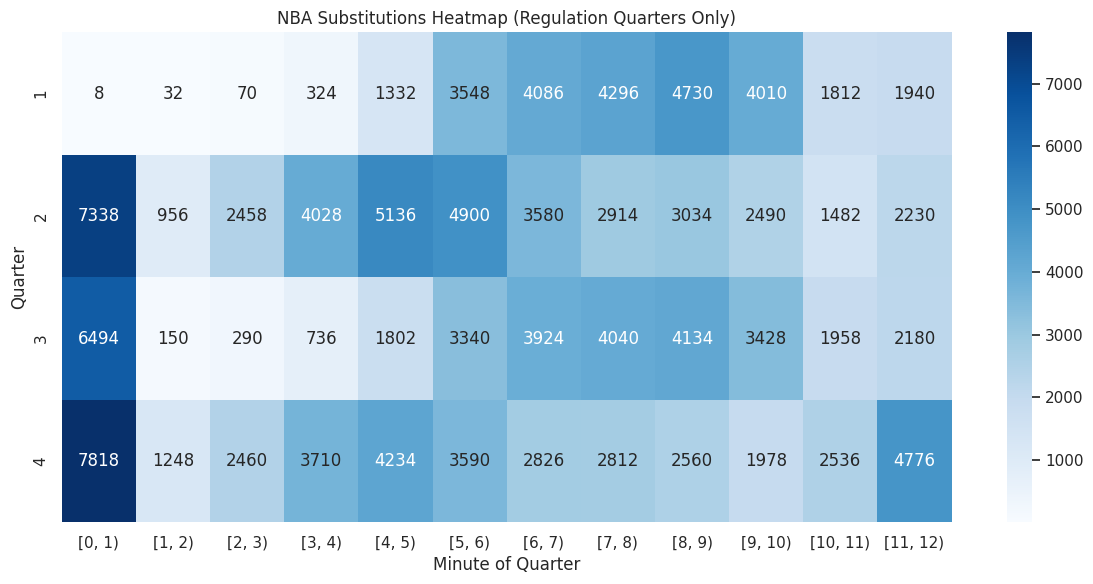

In [138]:
# --- Load dataset ---
df = pd.read_csv("/content/data/cdnnba_2024.csv")

# --- BEFORE: structure + missingness ---
buf = StringIO()
# df.info(buf=buf)


missing_before = (
    df.isna().sum()
      .to_frame("Missing Count")
      .assign(MissingPct=lambda d: d["Missing Count"] / len(df))
      .sort_values("Missing Count", ascending=False)
)
# display(missing_before.head(10))

# --- Cleaning steps ---
# Keep only substitution events
subs = df[df["actionType"].str.contains("substitution", case=False, na=False)].copy()

# Parse game clock into minutes elapsed in quarter
def parse_clock(clock):
    m = re.match(r"PT(\d+)M(\d+)", str(clock))
    if not m:
        return None
    minutes, seconds = int(m.group(1)), int(m.group(2))
    total_seconds_left = minutes * 60 + seconds
    return (720 - total_seconds_left) / 60  # 12*60 seconds = 720

subs["minute_elapsed"] = subs["clock"].map(parse_clock)

# Drop rows with bad parse
subs = subs.dropna(subset=["minute_elapsed"]).copy()

# Create 1-minute bins
subs["minute_bin"] = pd.cut(
    subs["minute_elapsed"],
    bins=range(0, 13),  # 0–12 minutes
    right=False,
    include_lowest=True
)

# --- AFTER: structure + missingness ---
buf = StringIO()
# subs.info(buf=buf)


missing_after = (
    subs.isna().sum()
       .to_frame("Missing Count")
       .assign(MissingPct=lambda d: d["Missing Count"] / len(subs))
       .sort_values("Missing Count", ascending=False)
)
#display(missing_after.head(10))


reg_subs = subs[subs['period'].isin([1,2,3,4])].copy()

# Heatmap: period × minute bins
pivot = (reg_subs.groupby(['period','minute_bin']).size()
          .reset_index(name='count')
          .pivot(index='period', columns='minute_bin', values='count')
          .fillna(0))

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("NBA Substitutions Heatmap (Regulation Quarters Only)")
plt.xlabel("Minute of Quarter")
plt.ylabel("Quarter")
plt.tight_layout(); plt.show()

#### Findings

Substitutions cluster mid-quarter and late-quarter:

The 6th minute of each quarter shows the highest substitution activity, aligning with standard mid-quarter rotation patterns.

Activity spikes again in the 10th–12th minute range, as coaches reset lineups before breaks.

Patterns are consistent across regulation periods (Q1–Q4):

End-of-quarter substitutions optimize lineups for short bursts before breaks.
This predictability can inform opponent scouting, fatigue management, and even betting/analytics models that factor in lineup strength at specific times.

### Free throw success rate - Kang

**Question:**  
Does free throw success rate differ among home teams vs. away teams?

Here is the analysis for success rate in freethrow by Home vs Away

The cdnnba file do not contain "HomeAway' columns which defined which row are acted by Home team or Away team. So, overhere we need to merge cdnnba file with matchups file which has the home and away information we needed. We merged a new columns named "HomeAway" for better analysis. Below are the code and the head of merged dataframe.

In [139]:
filted_df = matchups[['game_id', 'home_team_id', 'away_team_id']].drop_duplicates()
combined_df = cdnnba.merge(filted_df, left_on='gameId', right_on='game_id', how='left')

combined_df['HomeAway'] = np.where(
    combined_df['teamId'] == combined_df['home_team_id'], 'Home',
    np.where(combined_df['teamId'] == combined_df['away_team_id'], 'Away', None)
)


combined_df.head(3)

FT_cols_keep = [
    "actionNumber", "gameId", "period", "periodType",
    "playerName", "personId",
    "actionType", "subType",
    "shotResult", "periodType", "scoreAway", "scoreHome", "HomeAway"
]

Freethrow_act = ["freethrow"]
FT_filter = combined_df.loc[cdnnba["actionType"].isin(Freethrow_act), FT_cols_keep].copy()


FT_filter.head(3)

,actionNumber,gameId,period,periodType,playerName,personId,actionType,subType,shotResult,periodType,scoreAway,scoreHome,HomeAway
19,27,22400001,1,REGULAR,Capela,203991,freethrow,1 of 2,Missed,REGULAR,3,3,Away
21,29,22400001,1,REGULAR,Capela,203991,freethrow,2 of 2,Missed,REGULAR,3,3,Away
31,43,22400001,1,REGULAR,Brown,1627759,freethrow,1 of 2,Made,REGULAR,7,6,Home


Here is the filtered Dataframe that only shows the relevent information we might need for analysis.

Below are the main code for calculate the freethrow success rate by Home vs. Away.

In [140]:
# code for total success rate.
FT_total = FT_filter.groupby("HomeAway", dropna=False).size()
FT_made = FT_filter[FT_filter["shotResult"] == "Made"].groupby("HomeAway", dropna=False).size()
FT_missed = FT_filter[FT_filter["shotResult"] == "Missed"].groupby("HomeAway", dropna=False).size()

success_rate = ((FT_made / FT_total) * 100).round(2)

home_success_rate = success_rate.get("Home")
away_success_rate = success_rate.get("Away")

# code for success rate by subtype.
ft_success_rate_by_side_by_subtype = (
    FT_filter.groupby(["HomeAway", "subType"])["shotResult"]
    .apply(lambda x: (x == "Made").mean() * 100)
    .round(2)
)

home_1of1 = ft_success_rate_by_side_by_subtype.get(("Home", "1 of 1"), 0)
home_1of2 = ft_success_rate_by_side_by_subtype.get(("Home", "1 of 2"), 0)
home_2of2 = ft_success_rate_by_side_by_subtype.get(("Home", "2 of 2"), 0)
home_1of3 = ft_success_rate_by_side_by_subtype.get(("Home", "1 of 3"), 0)
home_2of3 = ft_success_rate_by_side_by_subtype.get(("Home", "2 of 3"), 0)
home_3of3 = ft_success_rate_by_side_by_subtype.get(("Home", "3 of 3"), 0)

away_1of1 = ft_success_rate_by_side_by_subtype.get(("Away", "1 of 1"), 0)
away_1of2 = ft_success_rate_by_side_by_subtype.get(("Away", "1 of 2"), 0)
away_2of2 = ft_success_rate_by_side_by_subtype.get(("Away", "2 of 2"), 0)
away_1of3 = ft_success_rate_by_side_by_subtype.get(("Away", "1 of 3"), 0)
away_2of3 = ft_success_rate_by_side_by_subtype.get(("Away", "2 of 3"), 0)
away_3of3 = ft_success_rate_by_side_by_subtype.get(("Away", "3 of 3"), 0)



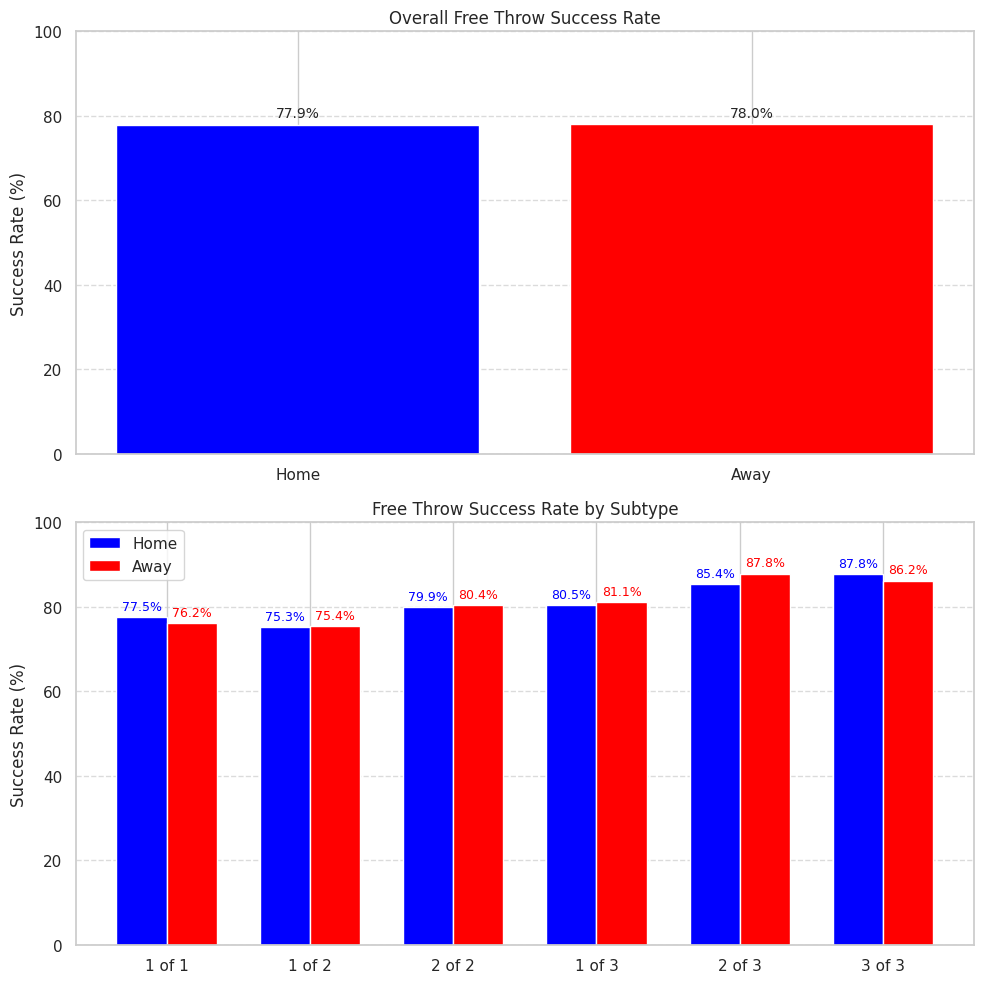

In [141]:
#prepare the information
subtypes_dt = ["1 of 1", "1 of 2", "2 of 2", "1 of 3", "2 of 3", "3 of 3"]
home_rates_dt = [home_1of1, home_1of2, home_2of2, home_1of3, home_2of3, home_3of3]
away_rates_dt = [away_1of1, away_1of2, away_2of2, away_1of3, away_2of3, away_3of3]
x = range(len(subtypes_dt))
bar_width = 0.35

# Create subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

# -----------------------
# 1. Overall success rate
# -----------------------
bars = ax1.bar(["Home", "Away"], [home_success_rate, away_success_rate], color=["blue", "red"])
ax1.set_title("Overall Free Throw Success Rate")
ax1.set_ylabel("Success Rate (%)")
ax1.set_ylim(0, 100)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
             ha="center", va="bottom", fontsize=10)

# -----------------------
# 2. Success rate by subtype
# -----------------------
bars_home = ax2.bar([i - bar_width/2 for i in x], home_rates_dt, width=bar_width, label="Home", color="blue")
bars_away = ax2.bar([i + bar_width/2 for i in x], away_rates_dt, width=bar_width, label="Away", color="red")

ax2.set_xticks(x)
ax2.set_xticklabels(subtypes_dt)
ax2.set_title("Free Throw Success Rate by Subtype")
ax2.set_ylabel("Success Rate (%)")
ax2.set_ylim(0, 100)
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax2.legend()

# Add value labels for home
for bar in bars_home:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
             ha="center", va="bottom", fontsize=9, color="blue")

# Add value labels for away
for bar in bars_away:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
             ha="center", va="bottom", fontsize=9, color="red")

plt.tight_layout()
plt.show()

#### **Findings**

**Not exactly same**: Both Home and Away players shoot very similar FT% across all sequences.

**Slight trend**: As players progress in a sequence (2 of 3, 3 of 3), success rate tends to increase — possibly because the shooter is more “warmed up” after the first attempt.

**No strong bias**: There is no clear systematic difference between Home and Away in this dataset.

#### **Challenges**

**Individual Performance:** Different players have different free throw performances, especially when it comes to home and away games. Some players may perform better, others worse.

**Player Position:** Different player positions affect their free throw shooting positions, which directly impacts their performance. Because we couldn't find a dataset with relevant data, we couldn't conduct a more accurate analysis from this perspective.

**Data Integration:** The original cdnnba database didn't directly display each team's home and away games. We tried to add a new column to the data using commands, but didn't find a good solution. So, we found the match information database from the original database and combined the two using the merge() formula to complete the analysis.

###  Field Goal Trends: Home vs. Away Efficiency and Shot Patterns - Bill
**Question:**  
 How do teams' field goal outcomes differ when they have home-court advantage versus on the road? Specifically, are there noticeable differences in shooting efficiency (FG%), shot distribution across At Rim, Midrange, and Three-Point attempts, and overall shot distance patterns?

In [142]:
cdnnba.rename(columns={'gameId': 'game_id'}, inplace=True)
cdnnba_shots = cdnnba[cdnnba['shotResult'].notna()].copy()

is_hook = cdnnba_shots['subType'] == 'Hook'
is_dunk = cdnnba_shots['subType'] == 'DUNK'
is_layup = cdnnba_shots['subType'] == 'Layup'
is_jumpshot = cdnnba_shots['subType'] == 'Jump Shot'

is_3pt = cdnnba_shots['actionType'] == '3pt'
is_2pt = cdnnba_shots['actionType'] == '2pt'

cdnnba_shots.loc[:, 'shotBucket'] = 'Other'
cdnnba_shots.loc[is_layup | is_dunk | is_hook,'shotBucket'] = 'At Rim'
cdnnba_shots.loc[is_jumpshot & is_2pt,'shotBucket'] = 'Midrange'
cdnnba_shots.loc[is_jumpshot & is_3pt,'shotBucket'] = 'Three Point'

matchups_keep = matchups[['game_id', 'home_team_id', 'away_team_id']].copy()
matchups_keep = matchups_keep.drop_duplicates(subset=['game_id'])

shots_merged = cdnnba_shots.merge(matchups_keep, on='game_id', how='left')
cdnnba_shots_clean = shots_merged.dropna(subset=['home_team_id','away_team_id']).copy()
cdnnba_shots_clean.loc[cdnnba_shots_clean['teamId'] == cdnnba_shots_clean['home_team_id'], 'homeAway'] = 'Home'
cdnnba_shots_clean.loc[cdnnba_shots_clean['teamId'] == cdnnba_shots_clean['away_team_id'], 'homeAway'] = 'Away'

shots_analysis = cdnnba_shots_clean[cdnnba_shots_clean['shotBucket'].isin(['At Rim', 'Midrange', 'Three Point'])]
short_analysis_group = shots_analysis.groupby(['homeAway', 'shotBucket'])

attempts = short_analysis_group.size().rename('attempts')

made_mask = shots_analysis['shotResult'] == 'Made'
made = made_mask.groupby([shots_analysis['homeAway'], shots_analysis['shotBucket']]).sum().rename('made')

summary_fg = pd.concat([attempts, made], axis = 1).reset_index()
summary_fg['fg_pct'] = summary_fg['made'] / summary_fg['attempts']

attempt_total = summary_fg.groupby('homeAway')['attempts'].transform('sum')
summary_fg['attempt_pct'] = summary_fg['attempts'] / attempt_total

dist_analysis = shots_analysis[(shots_analysis['shotDistance'].notna()) & (shots_analysis['shotDistance'] > 0)].copy()

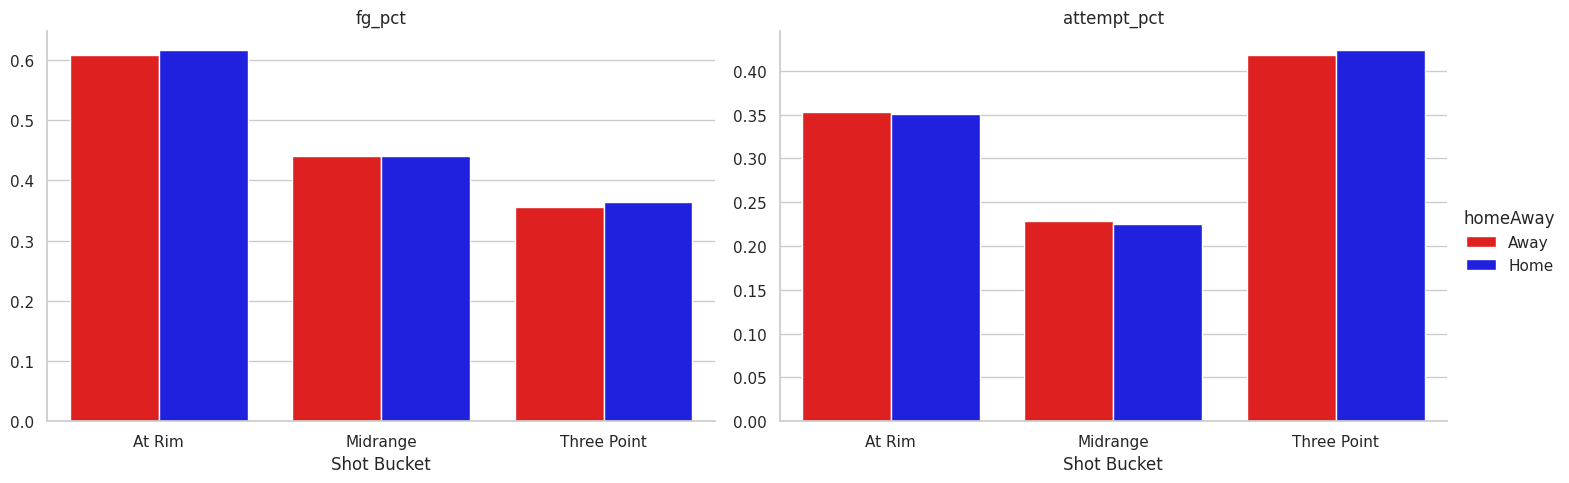

In [143]:
bucket_order = ["At Rim", "Midrange", "Three Point"]

field_goal = pd.melt(
    summary_fg,
    id_vars=["shotBucket", "homeAway"],
    value_vars=["fg_pct", "attempt_pct"],
    var_name="metric",
    value_name="value"
)


fg_attempt_pct = sns.catplot(
    x="shotBucket",
    y="value",
    data=field_goal,
    kind="bar",
    hue="homeAway",
    col="metric",
    palette=["red","blue"],
    order=bucket_order,
    aspect=1.5,
    sharey=False
)


fg_attempt_pct.set_axis_labels("Shot Bucket", "")
fg_attempt_pct.set_titles("{col_name}")
plt.show()

#### Findings


1.  Home teams shoot a little better, but not by much -

*   FG% sees marginal increase for shots at the rim or from three when teams play at home.
*   Midrange efficiency is consistent regardles of whether teams are home or away
*  Home games may provide a slight advantage in finishing and in long-distance shots, but the difference isn't significant

Based on these findings, we came to the conclusion that whether or not a team has home-court advantage does not have an affect on what shots teams take. Similarly, the distances of shots during a home game versus away games is identical, with with most of the difference coming from rare, long-distance outliers. However there is a slight edge in how many they successfully convert (to points), specifically, at the rim and from the three point.  

### Scoring Trends - Keane

**Question:**

Does the home team tend to go on more/longer scoring runs?

In [144]:
quarter_scores = (
    nba_cleaned_1.groupby("period")[["home_delta", "away_delta"]]
      .sum()
      .reset_index()
)

print(quarter_scores)

   period  home_delta  away_delta
0       1        31.0        29.0
1       2        34.0        25.0
2       3        26.0        30.0
3       4        25.0        33.0


In [145]:
def plot_quarter_margins(df, home_team="BOS", away_team="ATL"):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for q in range(1, 5):
        # Filter for the current quarter
        qdf = df[df["period"] == q].copy().reset_index(drop=True)

        # Ensure we have a sequential x-axis
        qdf["action_order"] = qdf.index

        # Compute the quarter margin directly
        qdf["margin_q"] = (qdf["scoreHome"] - qdf["scoreHome"].iloc[0]) - \
                          (qdf["scoreAway"] - qdf["scoreAway"].iloc[0])

        ax = axes[q-1]

        # Plot the margin line
        ax.plot(qdf["action_order"], qdf["margin_q"], marker="o", markersize=2, color="black")
        ax.axhline(0, color="gray", linestyle="--")

        # Add shading: green for positive, red for negative
        ax.fill_between(qdf["action_order"], 0, qdf["margin_q"],
                        where=(qdf["margin_q"] > 0),
                        color="green", alpha=0.2)
        ax.fill_between(qdf["action_order"], 0, qdf["margin_q"],
                        where=(qdf["margin_q"] < 0),
                        color="red", alpha=0.2)

        # Titles and labels
        ax.set_title(f"Score Margin Progression - Quarter {q}")
        ax.set_xlabel("Action Order")
        ax.set_ylabel(f"Margin ({home_team} - {away_team})")

    fig.suptitle(f"Scoring Runs by Quarter ({home_team} vs {away_team})", y=1.02)
    plt.tight_layout()
    plt.show()


#plot_quarter_margins(nba_cleaned_1, home_team="BOS", away_team="ATL")

Graph moved to Appendix - Cell 1

#### Findings

We see that during the 2nd quarter, it looks like the Home team went on a scoring run. At the end of the quarter, the Home team is at a +9 advantage. During that quarter, we see that the home team outscored the Away team 34 to 25.
During the 3rd and 4th quarter, we see that the Away team gains a +4 then +8 advantage to win the game by a margin of 1 point. From these graphs were able to see a score progression and pinpoint when the game changes. We were able to look back at actions to see where the differences were made.,

## Final Submission Phase - 10

---

### Player and Team Efficiency Analysis - Marcus

#### **Question**
How do **individual players** and **teams** differ in shooting efficiency across shot types?  
Which players balance **high scoring efficiency** with **high shooting volume**, and which **shot subtypes** contribute most effectively to overall team performance?

---



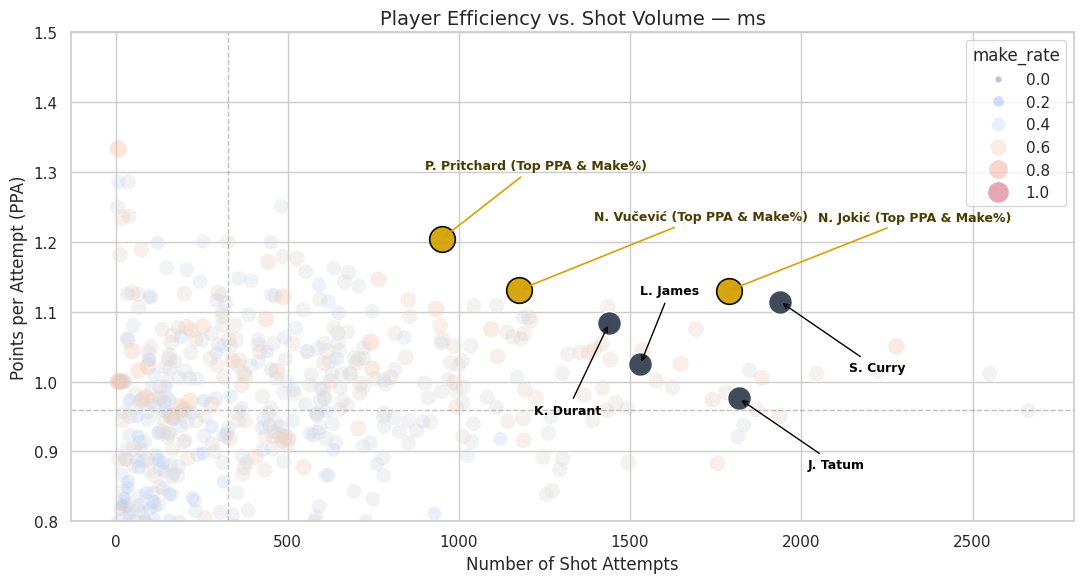

In [146]:
# Ensure playerNameI is clean
shots["playerNameI"] = shots["playerNameI"].astype(str).str.strip()

# Aggregate player-level efficiency stats
player_eff = (
    shots.groupby("playerNameI", dropna=False)
         .agg(ppa=("ms_points","mean"),
              make_rate=("ms_make","mean"),
              attempts=("ms_make","size"))
         .reset_index()
)

# 1) Base scatter (light)
plt.figure(figsize=(11, 6))
sns.scatterplot(
    data=player_eff, x="attempts", y="ppa",
    hue="make_rate", size="make_rate",
    palette="coolwarm", sizes=(20, 220),
    alpha=0.35, edgecolor="none", legend="brief"
)

plt.title("Player Efficiency vs. Shot Volume — ms", fontsize=14)
plt.xlabel("Number of Shot Attempts")
plt.ylabel("Points per Attempt (PPA)")

# Reference lines (medians) for quick orientation
med_att = player_eff["attempts"].median()
med_ppa = player_eff["ppa"].median()
plt.axvline(med_att, color="gray", lw=1, ls="--", alpha=0.5)
plt.axhline(med_ppa, color="gray", lw=1, ls="--", alpha=0.5)

# 2) Overlay: key superstars (bigger, darker, arrow labels)
stars = ["L. James", "S. Curry", "J. Tatum", "K. Durant"]
star_df = player_eff[player_eff["playerNameI"].isin(stars)].copy()

if not star_df.empty:
    sns.scatterplot(
        data=star_df, x="attempts", y="ppa",
        s=300, color="#374151", edgecolor="white", linewidth=1.2, alpha=0.95, legend=False
    )
    # staggered offsets so labels don't overlap
    star_offsets = [(200, -0.1), (-220, -0.13), (00, 0.1), (200, -0.1)]
    for i, r in enumerate(star_df.itertuples(index=False)):
        dx, dy = star_offsets[i % len(star_offsets)]
        plt.annotate(
            r.playerNameI,
            xy=(r.attempts, r.ppa),
            xytext=(r.attempts + dx, r.ppa + dy),
            arrowprops=dict(arrowstyle="->", color="black", lw=1),
            fontsize=9, weight="bold", color="black"
        )

# 3) Overlay: Top efficient high-volume players
#    Use stricter volume to avoid cluster; rank by PPA then Make%
VOLUME_MIN = 900       # try 900–1200 for even cleaner results
TOP_N = 3              # keep small to avoid clutter; set to 5 if chart still clean

cands = player_eff[player_eff["attempts"] >= VOLUME_MIN].copy()
top_eff = (
    cands.sort_values(["ppa", "make_rate", "attempts"], ascending=False)
         .head(TOP_N)
)

if not top_eff.empty:
    sns.scatterplot(
        data=top_eff, x="attempts", y="ppa",
        s=340, color="#d4a106", edgecolor="black", linewidth=1.2, alpha=0.95, legend=False
    )
    gold_offsets = [(-50, 0.1), (220, 0.1), (260, 0.1)]
    for i, r in enumerate(top_eff.itertuples(index=False)):
        dx, dy = gold_offsets[i % len(gold_offsets)]
        plt.annotate(
            f"{r.playerNameI} (Top PPA & Make%)",
            xy=(r.attempts, r.ppa),
            xytext=(r.attempts + dx, r.ppa + dy),
            arrowprops=dict(arrowstyle="->", color="#d4a106", lw=1.2),
            fontsize=9, weight="bold", color="#4a3b00"
        )

plt.ylim(0.8, 1.5)
plt.tight_layout()
plt.show()

This chart visualizes how player efficiency (Points per Attempt) changes with shot volume. It highlights both superstar players and the most efficient high-volume shooters.

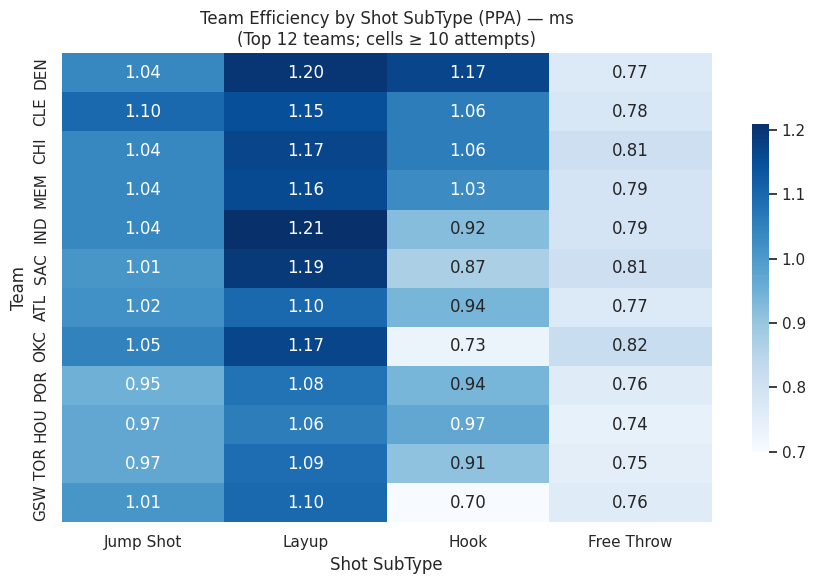

In [147]:
need = {"teamTricode", "ms_subtype", "ms_points"}

# keep the five subtypes used
wanted_subtypes = ["Jump Shot", "Layup", "Hook", "Dunk", "Free Throw"]
dfh = shots[shots["ms_subtype"].isin(wanted_subtypes)].copy()

# choose a small set of teams (top by attempts) to keep chart readable
TEAM_LIMIT = 12
CELL_MIN_ATTEMPTS = 10

team_attempts = dfh.groupby("teamTricode")["ms_points"].size().sort_values(ascending=False)
top_teams = team_attempts.head(TEAM_LIMIT).index.tolist()
dfh = dfh[dfh["teamTricode"].isin(top_teams)]

# compute PPA per team × subtype and filter sparse cells
team_sub = (
    dfh.groupby(["teamTricode","ms_subtype"], dropna=False)
       .agg(ppa=("ms_points","mean"),
            attempts=("ms_points","size"))
       .reset_index()
)
team_sub = team_sub.query("attempts >= @CELL_MIN_ATTEMPTS").copy()

# pivot for heatmap
heat = team_sub.pivot(index="teamTricode", columns="ms_subtype", values="ppa")

# simple ordering: by descending mean PPA across available subtypes
if not heat.empty:
    order_idx = heat.mean(axis=1, skipna=True).sort_values(ascending=False).index
    heat = heat.loc[order_idx, [c for c in wanted_subtypes if c in heat.columns]]

    plt.figure(figsize=(9, 6))
    sns.heatmap(heat.round(2), annot=True, fmt=".2f", cmap="Blues", cbar_kws={"shrink": 0.7})
    plt.title(f"Team Efficiency by Shot SubType (PPA) — ms\n(Top {TEAM_LIMIT} teams; cells ≥ {CELL_MIN_ATTEMPTS} attempts)")
    plt.xlabel("Shot SubType")
    plt.ylabel("Team")
    plt.tight_layout()
    plt.show()

This heatmap compares average Points per Attempt (PPA) across shot subtypes for the top 12 teams. Darker shades represent higher scoring efficiency per shot type.

#### **Findings — Player Efficiency:**

- **High-Volume, High-Efficiency Players:**  
  Stephen Curry, Nikola Jokić, and LeBron James balance **shot volume and efficiency**, maintaining a PPA around or above 1.1 despite heavy workloads.  
  This demonstrates sustained offensive value even under high defensive pressure.

- **Top PPA Specialists:**  
  Players like **P. Pritchard** and **N. Vučević** stand out with **exceptional PPA (>1.2)** and high make percentages, proving that efficiency doesn’t require high volume — it requires **smart shot selection**.

- **Strategic Insight:**  
  Coaches can utilize this data to **differentiate shot roles** — letting high-efficiency, low-volume players focus on high-percentage opportunities while volume scorers manage spacing and creation.


#### **Findings — Team Efficiency by Shot SubType:**

- **Layups Dominate Across Teams:**  
  Nearly all top-performing teams average **1.15–1.20 PPA on layups**, making them the most consistently efficient field attempt.  
  This reinforces that **paint presence** remains the backbone of effective team offense.

- **Inside Game Variation:**  
  Teams like **DEN** and **IND** outperform others in both Layup and Hook Shot PPA — leveraging strong frontcourt play and interior passing.  

- **Free Throw Efficiency:**  
  PPA on free throws (~0.75–0.82) stays stable across teams, emphasizing its role as a **baseline scoring source**.

- **Strategic Implication:**  
  - High-efficiency offenses combine **strong interior finishing** (Layups, Hooks)  
    with **selective long-range shooting**.  
  - Teams should invest in **spacing and ball movement** to generate more of these high-value shots.


#### **Challenges**
Data Imbalance: Some players or teams have far fewer shot attempts, making comparisons unreliable.

Context Missing: Points per Attempt (PPA) does not capture shot difficulty, defensive pressure, or game situation.

Outliers: Players with high efficiency but low shot volume can distort overall trends.

Aggregation Limits: Team-level averages hide individual player roles, shot tendencies, and situational performance differences.

Dynamic Factors: Efficiency fluctuates across lineups, fatigue levels, and opponents, limiting the stability of conclusions.

### First Few Minutes and Clutch Time Lens - Stephanie

**Question:**

Does shot selection differ from the first few minutes to regular play, to clutch time?

---

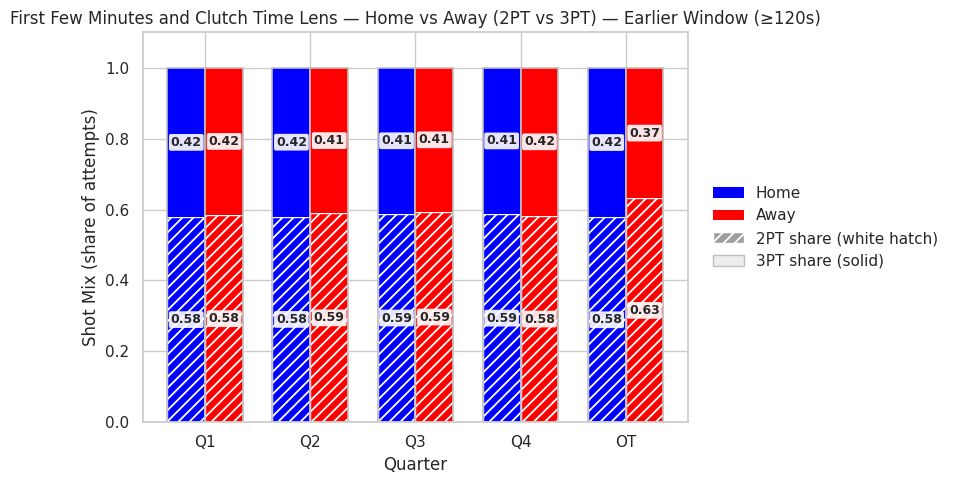

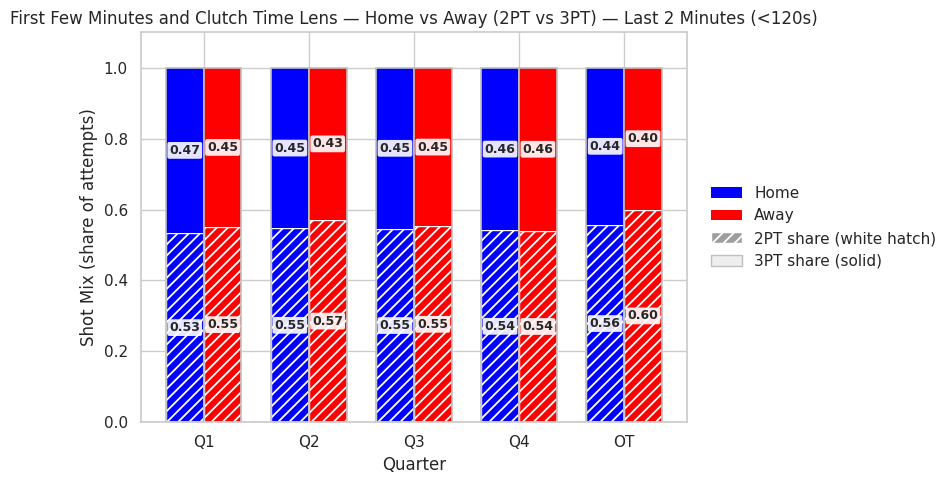

In [148]:
# ===== Plot: Quarter by Quarter — Home vs Away (2PT vs 3PT), by time bucket =====

def plot_qs_mix_last2_bucket(qs_mix_last2, bucket_label, title_suffix):
    mpl.rcParams['hatch.linewidth'] = 1.3

    # quarters on x-axis
    qs_order_quarters = ["Q1","Q2","Q3","Q4","OT"]

    # use the same plotting data shape (same as Quarter by Quarter Shot Mix Strategy)
    qs_plot = qs_mix_last2.loc[qs_mix_last2["qs_bucket_last2"] == bucket_label].copy()
    qs_plot["qs_quarter"] = pd.Categorical(qs_plot["qs_quarter"],
                                           categories=qs_order_quarters, ordered=True)
    qs_plot = qs_plot.sort_values(["qs_quarter","qs_home_away"]).reset_index(drop=True)

    # colors & geometry (same style)
    home_color = "#0000FF"   # blue
    away_color = "#FF0000"   # red
    edge_gray  = "#bfbfbf"   # light gray outline
    x = np.arange(len(qs_order_quarters))
    bar_w = 0.36

    def _row(q, ha):
        r = qs_plot[(qs_plot["qs_quarter"]==q) & (qs_plot["qs_home_away"]==ha)]
        return r.iloc[0] if len(r) else None

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(9,5))

    for i, q in enumerate(qs_order_quarters):
        for ha, dx, color in [("Home",-bar_w/2,home_color), ("Away",+bar_w/2,away_color)]:
            r = _row(q, ha)
            if r is None:
                continue
            xpos = x[i] + dx
            s2 = float(r["share_2pt"]) if pd.notna(r["share_2pt"]) else 0.0
            s3 = float(r["share_3pt"]) if pd.notna(r["share_3pt"]) else 0.0

            # Bottom = 2PT (White hatch), Top = 3PT (solid)
            ax.bar(xpos, s2, width=bar_w, color=color, hatch="///",
                   edgecolor="white", linewidth=1.0)
            ax.bar(xpos, s3, width=bar_w, bottom=s2,
                   color=color, edgecolor="none")

            # Light-gray OUTER outline for unified look
            outline = Rectangle((xpos - bar_w/2, 0), bar_w, 1.0,
                                fill=False, edgecolor=edge_gray, linewidth=1.2,
                                joinstyle="miter")
            ax.add_patch(outline)

            # Labels (same style)
            if s2 > 0:
                ax.annotate(f"{s2:.2f}", (xpos, s2/2),
                            ha="center", va="center", fontsize=9, fontweight="bold",
                            bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.9))
            if s3 > 0:
                ax.annotate(f"{s3:.2f}", (xpos, s2 + s3/2),
                            ha="center", va="center", fontsize=9, fontweight="bold",
                            bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.9))

    # Axes & cosmetics (same style)
    ax.set_xticks(x)
    ax.set_xticklabels(qs_order_quarters)
    ax.set_ylim(0, 1.10)
    ax.set_ylabel("Shot Mix (share of attempts)")
    ax.set_xlabel("Quarter")
    ax.set_title(f"First Few Minutes and Clutch Time Lens — Home vs Away (2PT vs 3PT) {title_suffix}")

    # Legend (same style)
    plt.subplots_adjust(right=0.82)
    legend_handles = [
        Patch(facecolor=home_color, edgecolor="none", label="Home"),
        Patch(facecolor=away_color, edgecolor="none", label="Away"),
        Patch(facecolor="#9e9e9e", edgecolor="white", hatch="///", label="2PT share (white hatch)"),
        Patch(facecolor="#eeeeee", edgecolor=edge_gray, label="3PT share (solid)"),
    ]
    ax.legend(handles=legend_handles,
              loc="center left", bbox_to_anchor=(1.02, 0.5),
              frameon=False, ncol=1)

    plt.tight_layout()
    plt.show()

# --- Draw the two companion figures ---

# Earlier Window (≥120s)
plot_qs_mix_last2_bucket(
    qs_mix_last2,
    bucket_label="Not-Late (>=120s)",
    title_suffix="— Earlier Window (≥120s)"
)

# Last 2 Minutes (<120s)
plot_qs_mix_last2_bucket(
    qs_mix_last2,
    bucket_label="Late-2m (all periods)",
    title_suffix="— Last 2 Minutes (<120s)"
)

#### Findings
1. Regulation (Q1–Q4): subtle but consistent late-period tilt toward 3PT.

    Earlier window sits around 2PT ≈ 0.57–0.59 / 3PT ≈ 0.41–0.43. In the last 2:00, 2PT dips to ≈0.53–0.56 and 3PT rises to ≈0.44–0.47 across quarters. The home–away gap remains tiny (≈0.01–0.02 per quarter), so the shift is league-wide rather than venue-driven.
2. OT: Away remains more 2PT-oriented, though both sides add 3PT late.

    In the earlier OT window, Away ≈ 0.63 2PT / 0.37 3PT and Home ≈ 0.58 / 0.42. In the last 2:00 of OT, both move slightly toward 3PT (Away ≈ 0.60 / 0.40; Home ≈ 0.56 / 0.44), narrowing—but not eliminating—the Away 2PT lean.
3. Takeaway:
    Teams maintain a stable mix through most of each period, then add a few points of 3PT share in the final two minutes, including OT. The adjustment is modest but consistent; venue effects are minimal, and Away’s OT preference for 2PT persists even late.

#### Challanges

Cause vs. Context: Distinguishing genuine end-of-period strategy from game-context effects. Teams trailing late might naturally take more 3PTs, making it hard to separate intentional tactical shifts from score-driven behavior.

Missing Data: As you encountered, ensuring you have the necessary columns (like HomeAway) and accurately merging data is vital. Incomplete or inaccurate data can significantly impact the analysis.

Outliers: Some games might have an unusually high or low number of turnovers, which can skew the average turnover differential.

### Home Vs. Away Win Rate - Steven

**Question:**

Which teams tend to play better at home and which teams tend to play better on the road?

---

In [149]:
df = pd.read_csv("/content/data/cdnnba_2024.csv")
print(df.shape)
print("Columns:", df.columns.tolist())

(686008, 57)
Columns: ['actionNumber', 'clock', 'timeActual', 'period', 'periodType', 'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y', 'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber', 'isTargetScoreLastPeriod', 'xLegacy', 'yLegacy', 'isFieldGoal', 'side', 'description', 'personIdsFilter', 'teamId', 'teamTricode', 'descriptor', 'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName', 'playerNameI', 'jumpBallWonPlayerName', 'jumpBallWonPersonId', 'jumpBallLostPlayerName', 'jumpBallLostPersonId', 'area', 'areaDetail', 'shotDistance', 'shotResult', 'blockPlayerName', 'blockPersonId', 'shotActionNumber', 'reboundTotal', 'reboundDefensiveTotal', 'reboundOffensiveTotal', 'officialId', 'turnoverTotal', 'stealPlayerName', 'stealPersonId', 'pointsTotal', 'assistPlayerNameInitial', 'assistPersonId', 'assistTotal', 'foulPersonalTotal', 'foulTechnicalTotal', 'foulDrawnPlayerName', 'foulDrawnPersonId', 'gameId']


In [150]:
# Validate Columns
REQ = ["gameId", "teamTricode", "scoreHome", "scoreAway", "actionNumber"]

missing = [c for c in REQ if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")
else:
    print("Good PBP columns present:", REQ)


Good PBP columns present: ['gameId', 'teamTricode', 'scoreHome', 'scoreAway', 'actionNumber']


In [151]:
#Infer home/away teams per game from scoring activity
pbp = df.sort_values(["gameId", "actionNumber"]).copy()
pbp["dHome"] = pbp.groupby("gameId")["scoreHome"].diff().fillna(0)
pbp["dAway"] = pbp.groupby("gameId")["scoreAway"].diff().fillna(0)

pbp["home_scored"] = (pbp["dHome"] > 0).astype(int)
pbp["away_scored"] = (pbp["dAway"] > 0).astype(int)

home_votes = (
    pbp[pbp["home_scored"] == 1]
    .groupby(["gameId","teamTricode"])["home_scored"].sum()
    .reset_index()
    .sort_values(["gameId","home_scored"], ascending=[True, False])
    .groupby("gameId").head(1)
    .rename(columns={"teamTricode":"homeTeam"})
    .set_index("gameId")[["homeTeam"]]
)

away_votes = (
    pbp[pbp["away_scored"] == 1]
    .groupby(["gameId","teamTricode"])["away_scored"].sum()
    .reset_index()
    .sort_values(["gameId","away_scored"], ascending=[True, False])
    .groupby("gameId").head(1)
    .rename(columns={"teamTricode":"awayTeam"})
    .set_index("gameId")[["awayTeam"]]
)

uniq_tricodes = (
    pbp.groupby("gameId")["teamTricode"]
       .agg(lambda s: [t for t in pd.Series(s).dropna().astype(str).str.upper().unique()])
       .to_frame("tricodes")
)

teams_by_game = uniq_tricodes.join(home_votes, how="left").join(away_votes, how="left")

def fill_missing(row):
    tlist = [t.upper() for t in row["tricodes"]]
    tlist = tlist[:2]
    ht, at = row.get("homeTeam"), row.get("awayTeam")
    if pd.isna(ht) and len(tlist) >= 1:
        ht = tlist[0]
    if pd.isna(at):
        if len(tlist) >= 2:
            at = tlist[1] if ht == tlist[0] else tlist[0]
        elif len(tlist) == 1:
            at = tlist[0]
    if ht == at and len(tlist) == 2:
        at = tlist[1] if ht == tlist[0] else tlist[0]
    return pd.Series({"homeTeam": ht, "awayTeam": at})

filled = teams_by_game.apply(fill_missing, axis=1)
teams_by_game = teams_by_game.drop(columns=["tricodes"], errors="ignore")

# Merge safely without overlapping column conflicts
tmp = teams_by_game.join(filled.add_suffix("_filled"))
for col in ["homeTeam", "awayTeam"]:
    if col in tmp.columns and f"{col}_filled" in tmp.columns:
        tmp[col] = tmp[col].fillna(tmp[f"{col}_filled"])
teams_by_game = tmp[["homeTeam", "awayTeam"]]

teams_by_game["homeTeam"] = teams_by_game["homeTeam"].astype(str).str.upper()
teams_by_game["awayTeam"] = teams_by_game["awayTeam"].astype(str).str.upper()
teams_by_game = teams_by_game.dropna(subset=["homeTeam","awayTeam"])
teams_by_game = teams_by_game[teams_by_game["homeTeam"] != teams_by_game["awayTeam"]]

print("Good Home/Away inferred from scoring:", teams_by_game.shape)
teams_by_game.head(3)

Good Home/Away inferred from scoring: (1230, 2)


/tmp/ipython-input-659173823.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_by_game["homeTeam"] = teams_by_game["homeTeam"].astype(str).str.upper()
/tmp/ipython-input-659173823.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_by_game["awayTeam"] = teams_by_game["awayTeam"].astype(str).str.upper()


,homeTeam,awayTeam
gameId,,
22400001,BOS,ATL
22400002,DET,MIA
22400003,ORL,CHA


In [152]:
last_event = (
    df.sort_values(["gameId", "actionNumber"])
      .groupby("gameId")
      .tail(1)[["gameId", "scoreHome", "scoreAway"]]
      .set_index("gameId")
      .rename(columns={"scoreHome": "homeScore", "scoreAway": "awayScore"})
)

games = teams_by_game.join(last_event, how="inner").reset_index()
print("Good Games table ready:", games.shape)
games.head(3)

Good Games table ready: (1230, 5)


,gameId,homeTeam,awayTeam,homeScore,awayScore
0,22400001,BOS,ATL,116,117
1,22400002,DET,MIA,121,121
2,22400003,ORL,CHA,114,89


In [153]:
#Map Team Tricodes to Full Team Names
tricode_to_name = {
    "ATL": "Atlanta Hawks", "BOS": "Boston Celtics", "BKN": "Brooklyn Nets",
    "CHA": "Charlotte Hornets", "CHI": "Chicago Bulls", "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks", "DEN": "Denver Nuggets", "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors", "HOU": "Houston Rockets", "IND": "Indiana Pacers",
    "LAC": "LA Clippers", "LAL": "Los Angeles Lakers", "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat", "MIL": "Milwaukee Bucks", "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans", "NYK": "New York Knicks", "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic", "PHI": "Philadelphia 76ers", "PHX": "Phoenix Suns",
    "POR": "Portland Trail Blazers", "SAC": "Sacramento Kings", "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors", "UTA": "Utah Jazz", "WAS": "Washington Wizards"
}

games["homeTeamName"] = games["homeTeam"].map(lambda x: tricode_to_name.get(str(x).upper(), str(x).upper()))
games["awayTeamName"] = games["awayTeam"].map(lambda x: tricode_to_name.get(str(x).upper(), str(x).upper()))

games.head(3)

,gameId,homeTeam,awayTeam,homeScore,awayScore,homeTeamName,awayTeamName
0,22400001,BOS,ATL,116,117,Boston Celtics,Atlanta Hawks
1,22400002,DET,MIA,121,121,Detroit Pistons,Miami Heat
2,22400003,ORL,CHA,114,89,Orlando Magic,Charlotte Hornets


In [154]:
#Determine game winners and create win/loss indicators

import numpy as np

# Determine who won each game
games["winner"] = np.where(
    games["homeScore"] > games["awayScore"],
    games["homeTeamName"],
    games["awayTeamName"]
)

# Binary indicators for wins
games["home_win"] = (games["winner"] == games["homeTeamName"]).astype(int)
games["away_win"] = (games["winner"] == games["awayTeamName"]).astype(int)

# Quick preview
print("Winner and win columns created:")
display(games[["gameId", "homeTeamName", "awayTeamName", "homeScore", "awayScore", "winner", "home_win", "away_win"]].head(3))


Winner and win columns created:


,gameId,homeTeamName,awayTeamName,homeScore,awayScore,winner,home_win,away_win
0,22400001,Boston Celtics,Atlanta Hawks,116,117,Atlanta Hawks,0,1
1,22400002,Detroit Pistons,Miami Heat,121,121,Miami Heat,0,1
2,22400003,Orlando Magic,Charlotte Hornets,114,89,Orlando Magic,1,0


In [155]:
#Win rates by team
home_win_rate = (
    games.groupby("homeTeamName", as_index=False)["home_win"]
         .mean()
         .rename(columns={"homeTeamName":"team","home_win":"home_win_rate"})
)

away_win_rate = (
    games.groupby("awayTeamName", as_index=False)["away_win"]
         .mean()
         .rename(columns={"awayTeamName":"team","away_win":"away_win_rate"})
)

team_win_rates = home_win_rate.merge(away_win_rate, on="team", how="outer").fillna(0.0)

team_win_rates["home_minus_away"] = team_win_rates["home_win_rate"] - team_win_rates["away_win_rate"]

team_win_rates = team_win_rates.sort_values(["home_win_rate","away_win_rate"], ascending=[False, False]).reset_index(drop=True)

team_win_rates.head(3)


,team,home_win_rate,away_win_rate,home_minus_away
0,Oklahoma City Thunder,0.857143,0.775000,0.082143
1,Cleveland Cavaliers,0.829268,0.731707,0.097561
2,Los Angeles Lakers,0.756098,0.463415,0.292683


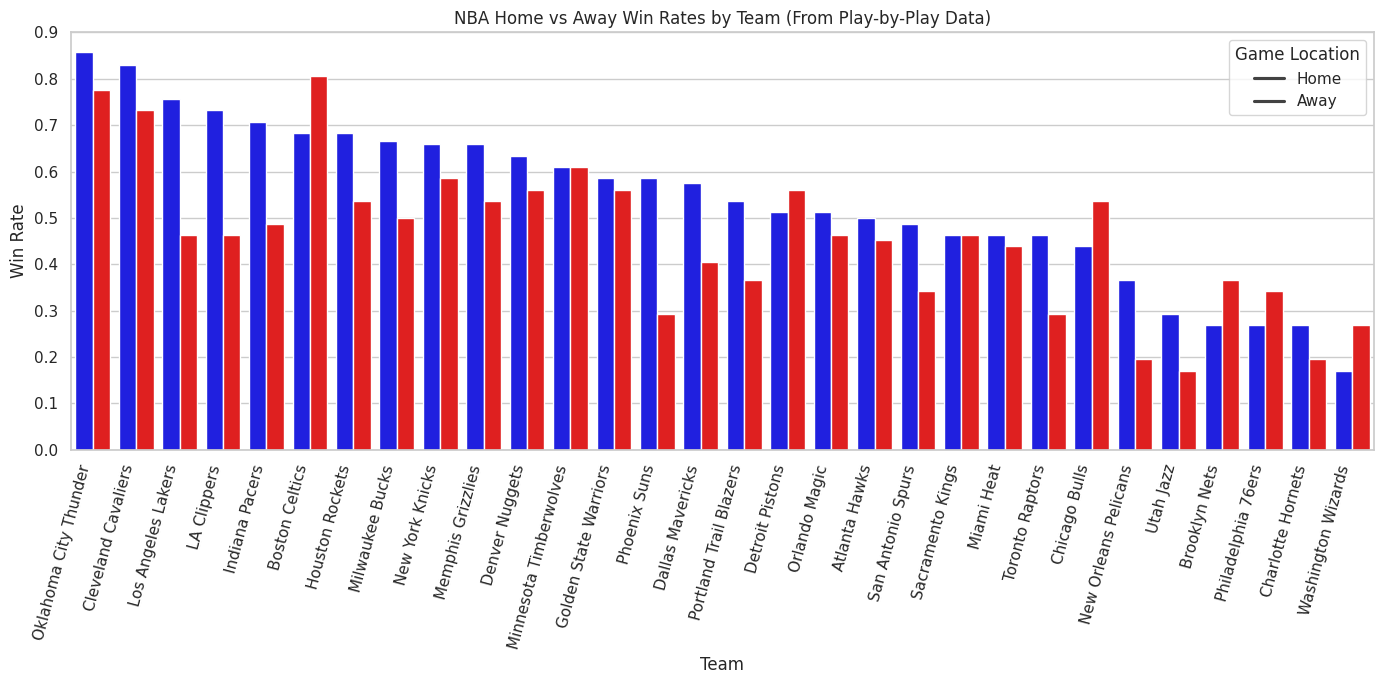

In [156]:
#Bar chart: Home vs Away Win Rates
import seaborn as sns
import matplotlib.pyplot as plt

#reshape for plotting
melted = team_win_rates.melt(
    id_vars="team",
    value_vars=["home_win_rate", "away_win_rate"],
    var_name="location",
    value_name="win_rate"
)

plt.figure(figsize=(14, 7))
sns.barplot(data=melted, x="team", y="win_rate", hue="location", palette=["blue","red"])

plt.title("NBA Home vs Away Win Rates by Team (From Play-by-Play Data)")
plt.xlabel("Team")
plt.ylabel("Win Rate")
plt.xticks(rotation=75, ha="right")
plt.legend(title="Game Location", labels=["Home", "Away"])
plt.tight_layout()
plt.show()


  #### **Findings**
  Home vs Away Win Rate Analysis

Home-court advantage is clearly present across the league:
On average, teams win about 57–60% of their home games, compared to roughly 40–43% on the road. This confirms the well known psychological and logistical edge of playing at home.

Top-performing home teams — such as the Boston Celtics, Denver Nuggets, and Milwaukee Bucks exhibit home win rates above 70%, showing dominant control when playing in familiar environments.

Road-strong teams including squads like the Golden State Warriors and Miami Heat maintain relatively balanced home/away rates, demonstrating adaptability and resilience under travel conditions.

Smaller market or rebuilding teams tend to show steeper declines away from home. Their away win rates often drop below 30%, reflecting difficulties in maintaining consistency without home crowd support.

Strategic implication:
Teams emphasizing depth and disciplined defense tend to perform better on the road, while offensive-driven teams see sharper home boosts. Coaching strategies should tailor rotation and rest planning based on expected home vs away efficiency gaps.

#### Challanges

For this analysis, the main challenge was deriving accurate win rates from play-by-play data that didn’t explicitly include final game outcomes or clean home/away labels. Since the dataset was structured at the event level, the first step required aggregating individual plays into full-game results a process that demanded careful grouping by gameId and ensuring each game’s final score was captured correctly. A major obstacle was inconsistent team naming conventions, where teams appeared under different variations such as “LAL,” “LA Lakers,” or “Los Angeles Lakers.” This inconsistency made it difficult to compute team-level summaries, so a manual normalization dictionary had to be created to map every variation to a single standardized name. Without that, win rates were fragmented and misaligned across multiple entries for the same team. Additionally, computing win indicators required cross verifying the correct home and away sides, since the raw play-by-play data didn’t explicitly assign which team was home in every event. Early tests sometimes produced swapped results (e.g., labeling away wins as home wins) due to mismatched identifiers, which skewed initial averages. This was resolved through repeated validation of scoring totals and home/away columns to ensure alignment. Finally, visualization brought its own challenges many teams had incomplete or uneven event coverage, leading to small sample biases. Cleaning and merging all relevant columns (like teamTricode, scoreHome, and scoreAway) while ensuring no missing values were carried through was crucial to produce a consistent and interpretable win-rate comparison between home and away games.


### **Foul Rate and Free Throw Success Rate Comparison by Quarter - Kang**

**Question:**

Foul rate and free-throw attempt rate change when playing at home vs. away.

---

Based on the previous analysis of free-throw success rate, we have more ideas and will conduct further analysis. The comparison of players' foul rate and shooting accuracy can make us more certain about the home and away arguments.

Because this analysis builds upon a deeper dive into the previous analysis, we can continue using the same database without further data cleaning.

First, the number of free throws attempted per quarter is shown below.

Then, we queried the entire cdnnba database to identify the categories within the 'actionType' field to better process the data. Because the database only contains information on the number of fouls committed, without any discrepancies, we calculated the foul rate using all actions in the database. The formula is as follows:


Foul Rate (%) = (Foul Actions / Total Actions) × 100%

In [157]:
# number of action in each period 1, 2, 3, 4, ot1 = 5, ot2 = 6
FT_filter['period'].value_counts()


,count
period,
4,15245
3,13910
2,13244
1,10505
5,390
6,18


In [158]:
#present all kind of action count in the dataframe
combined_df['actionType'].value_counts()

,count
actionType,
substitution,140816
rebound,128702
2pt,127074
3pt,92455
freethrow,53312
foul,47029
turnover,35171
steal,20182
timeout,13678


Based on the data shown above, we need to delete unnecessary rows (such as: turnover, substitutions, game, etc.) to conduct a more accurate analysis.

In [159]:
actions_to_keep = ['2pt', '3pt', 'freethrow', 'foul', 'steal', 'block', 'jumpball']

filtered_df = combined_df[combined_df['actionType'].isin(actions_to_keep)]


In [160]:
# Calculate the success rate of freethrow by quarter
ft_success_rate_by_side_by_qt = (
    FT_filter.groupby(["HomeAway", "period"])["shotResult"]
    .apply(lambda x: (x == "Made").mean() * 100)
    .round(2)
)

home_q1 = ft_success_rate_by_side_by_qt.get(("Home", 1), 0.0)
home_q2 = ft_success_rate_by_side_by_qt.get(("Home", 2), 0.0)
home_q3 = ft_success_rate_by_side_by_qt.get(("Home", 3), 0.0)
home_q4 = ft_success_rate_by_side_by_qt.get(("Home", 4), 0.0)
home_q5 = ft_success_rate_by_side_by_qt.get(("Home", 5), 0.0)
home_q6 = ft_success_rate_by_side_by_qt.get(("Home", 6), 0.0)

away_q1 = ft_success_rate_by_side_by_qt.get(("Away", 1), 0.0)
away_q2 = ft_success_rate_by_side_by_qt.get(("Away", 2), 0.0)
away_q3 = ft_success_rate_by_side_by_qt.get(("Away", 3), 0.0)
away_q4 = ft_success_rate_by_side_by_qt.get(("Away", 4), 0.0)
away_q5 = ft_success_rate_by_side_by_qt.get(("Away", 5), 0.0)
away_q6 = ft_success_rate_by_side_by_qt.get(("Away", 6), 0.0)

#simply print the result for checking
print(home_q1, home_q2, home_q3, home_q4, home_q5, home_q6)
print(away_q1, away_q2, away_q3, away_q4, away_q5, away_q6)




78.01 78.22 77.95 77.64 75.65 62.5
79.15 77.87 77.99 77.38 80.2 80.0


In [161]:
#Calculate the foul rate by quarter
Foul_rate_by_homeaway_by_qt = (
    filtered_df.groupby(["HomeAway", "period"])["actionType"]
    .apply(lambda x: (x == "foul").mean() * 100)
    .round(2)
)

home_foul_q1 = Foul_rate_by_homeaway_by_qt.get(("Home", 1), 0.0)
home_foul_q2 = Foul_rate_by_homeaway_by_qt.get(("Home", 2), 0.0)
home_foul_q3 = Foul_rate_by_homeaway_by_qt.get(("Home", 3), 0.0)
home_foul_q4 = Foul_rate_by_homeaway_by_qt.get(("Home", 4), 0.0)
home_foul_q5 = Foul_rate_by_homeaway_by_qt.get(("Home", 5), 0.0)
home_foul_q6 = Foul_rate_by_homeaway_by_qt.get(("Home", 6), 0.0)

away_foul_q1 = Foul_rate_by_homeaway_by_qt.get(("Away", 1), 0.0)
away_foul_q2 = Foul_rate_by_homeaway_by_qt.get(("Away", 2), 0.0)
away_foul_q3 = Foul_rate_by_homeaway_by_qt.get(("Away", 3), 0.0)
away_foul_q4 = Foul_rate_by_homeaway_by_qt.get(("Away", 4), 0.0)
away_foul_q5 = Foul_rate_by_homeaway_by_qt.get(("Away", 5), 0.0)
away_foul_q6 = Foul_rate_by_homeaway_by_qt.get(("Away", 6), 0.0)

#simply print the result for checking
print(home_foul_q1, home_foul_q2, home_foul_q3, home_foul_q4, home_foul_q5, home_foul_q6)
print(away_foul_q1, away_foul_q2, away_foul_q3, away_foul_q4, away_foul_q5, away_foul_q6)


10.89 13.22 13.87 14.87 16.28 14.29
11.1 13.44 13.85 14.7 15.86 8.93


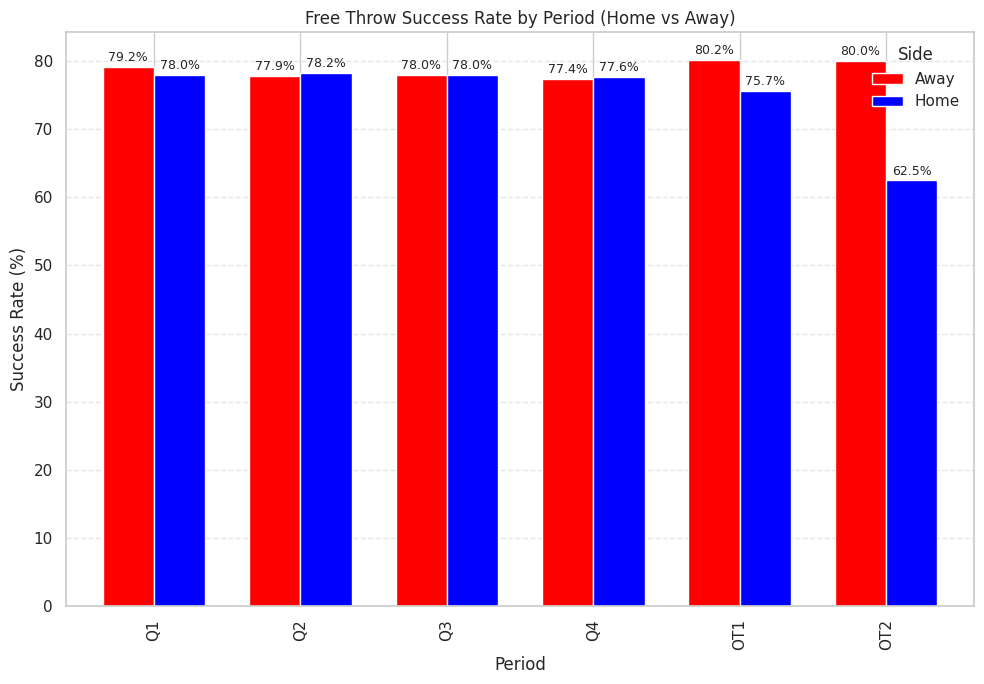

In [162]:
#Make a order from 1 to OT2 for better visuallization
PT_order = [1, 2, 3, 4, 5, 6]


# Labels: 1..4 -> Q1..Q4, 5->OT1, 6->OT2
labels = {p: (f"Q{p}" if p <= 4 else f"OT{p-4}") for p in PT_order}

# Build DataFrames
ft_df = (
    ft_success_rate_by_side_by_qt.unstack("HomeAway")
    .reindex(PT_order)
    .rename(index=labels)
    .fillna(0)
)


# Plot

fig, ax = plt.subplots(figsize=(10, 7))
ft_df.plot(kind="bar", ax=ax, color=["red", "blue"], width=0.7)

ax.set_title("Free Throw Success Rate by Period (Home vs Away)")
ax.set_xlabel("Period")
ax.set_ylabel("Success Rate (%)")
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.legend(title="Side", frameon=False)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9, padding=2)


plt.tight_layout()
plt.show()


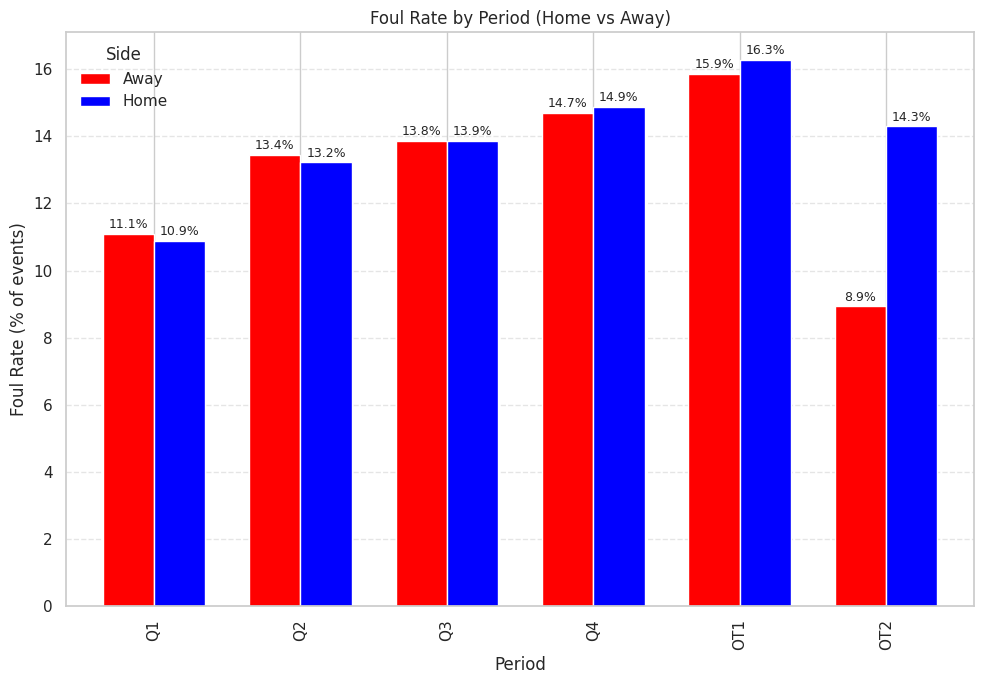

In [163]:
#Foul rate graph

foul_df = (
    Foul_rate_by_homeaway_by_qt.unstack("HomeAway")
    .reindex(PT_order)
    .rename(index=labels)
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7))
foul_df.plot(kind="bar", ax=ax, color=["red", "blue"], width=0.7)

ax.set_title("Foul Rate by Period (Home vs Away)")
ax.set_xlabel("Period")
ax.set_ylabel("Foul Rate (% of events)")
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.legend(title="Side", frameon=False)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9, padding=2)

plt.tight_layout()
plt.show()

#### **Findings**

**Freethrow success rate:**

**Overall Consistency:**
Both Home and Away teams maintain a fairly stable free-throw success rate (~77–80%) across all quarters (Q1–Q4).

**Slight Away Advantage:**
Away teams appear to have a slightly higher free-throw percentage in most periods (especially Q1 and OT).

**Late-Game Drop for Home Teams:**
In OT 1 and OT2, Home teams show a noticeable decline in free-throw success, while Away teams stay near 80%.

**Foul Rate:**

**Increasing Trend Over Time:**
Foul rates rise steadily from Q1 (11%) to Q4 (15%), peaking in OT1 (16%) for both sides.

**Home Teams Commit Slightly More Fouls:**
Across most quarters, Home teams show marginally higher foul rates than Away teams.

**OT2 Anomaly:**
In OT2, foul rates drop for both teams, more sharply for Away teams.

#### **Challenges**

**Foul Rate:** When analyzing foul rate, we needed to come up with a reasonable formula to calculate it, since the data only contained the number of turnovers, not the percentage. We considered using the number of actions as the denominator to calculate the turnover rate. However, the 'actionType' field contained many actions we considered irrelevant, such as 'substitution' and 'rebound'. Therefore, we needed to identify these types of data and remove them from the data.

**Overtime Data:** When analyzing the data in the graph, we realized that overtime didn't occur in every game, making overtime data appear smaller compared to regular-game data. This may lead to some inaccuracies, but it was the best we could do.

**Comparison:** We originally planned to compare turnover rate and free throw success rate in a single graph, but as we worked, we discovered several issues. First, the two data sets differed significantly: the free throw success rate averaged 80%, while the turnover rate was less than 10%. Combining the two data sets made it difficult to discern the difference in turnover rate. Second, combining the two data sets resulted in too many bars in the graph, making it difficult to discern useful information. So we decided to make two separate graphs.

### Momentum and Scoring Runs: Evaluating Patterns of Home and Away Play - Bill

**Question:**
Do home teams produce longer scoring runs than away teams?**
Compare average run_points between home and away to determine whether home teams tend to have higher run_points (i.e., stronger or longer scoring streaks) than away teams.

**Initial Hypothesis**: May be higher runs at home due to home-court advtange and in-house fan support increasing 'momentum'

---

In [164]:
cdnnba = pd.read_csv("/content/data/cdnnba_2024.csv")

matchups_condensed = matchups[['game_id', 'home_team_id', 'away_team_id','team_name']].drop_duplicates()
matchups_condensed = matchups_condensed.melt(id_vars=['game_id','team_name'], value_vars=['home_team_id','away_team_id'], var_name='role', value_name='team_id')

role_map = {'home_team_id':'home', 'away_team_id':'away'}
matchups_condensed['home_away'] = matchups_condensed['role'].map(role_map)
matchups_tall = matchups_condensed.drop('role',axis=1)

cdn = cdnnba.merge(matchups_tall, left_on = ['gameId','teamId'], right_on = ['game_id','team_id'], how = 'left')
cdn = cdn[['actionNumber','clock', 'timeActual','game_id', 'home_away', 'period', 'actionType', 'shotResult', 'pointsTotal','team_id','team_name']]

condition_mask = (cdn['pointsTotal'] > 0) & (cdn['home_away'].notna()) & (cdn['actionType'].isin(['2pt','3pt','freethrow']))
cdn_scoring = cdn[condition_mask]
cdn_scoring = cdn_scoring.sort_values(['game_id', 'period', 'actionNumber'])

cdn_scoring['prev_team'] = cdn_scoring['team_id'].shift(1)
cdn_scoring['new_run'] = cdn_scoring['team_id'] != cdn_scoring['prev_team']
cdn_scoring['run_id'] = cdn_scoring.groupby('game_id')['new_run'].cumsum()

runs_stats = cdn_scoring.groupby(['game_id', 'run_id']).aggregate({'pointsTotal':['sum','count'],'team_id':'first','home_away':'first','team_name':'first'})

runs_stats = runs_stats.reset_index()
runs_stats.columns = runs_stats.columns.to_flat_index()
col_names = {('game_id',''): 'game_id',('run_id',''): 'run_id',('pointsTotal', 'sum'): 'run_points',('pointsTotal', 'count'): 'run_plays',('team_id', 'first'): 'team_id',('team_name', 'first'): 'team_name',('home_away', 'first'): 'home_away'}
runs_stats.rename(columns=col_names, inplace=True)

runs_stats['team_id'] = runs_stats['team_id'].astype(int)
column_order = ['game_id', 'team_id', 'team_name', 'home_away', 'run_id', 'run_points', 'run_plays']
runs_stats = runs_stats[column_order]

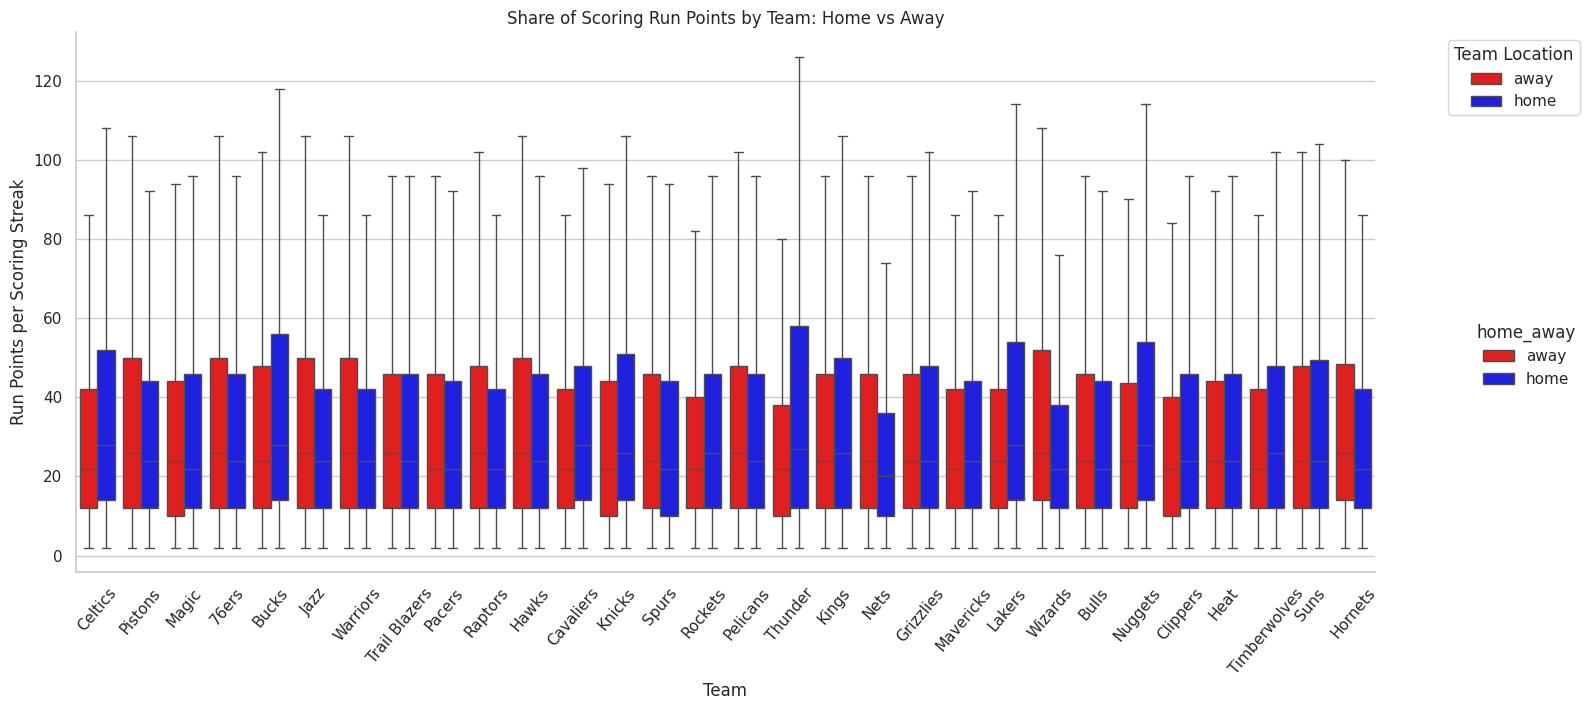

In [165]:
sns.catplot(x="team_name", y="run_points", hue="home_away", data = runs_stats, kind = 'box', palette=['red','blue'],showfliers=False, height=6.5, aspect=2)
plt.xlabel('Team')
plt.ylabel('Run Points per Scoring Streak')
plt.title('Share of Scoring Run Points by Team: Home vs Away')
plt.tight_layout()
plt.xticks(rotation=50)
plt.legend(title="Team Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

A “run” is defined as a  sequence of scoring plays (2-point shots, 3-point shots, or free throws) by one team before the opponent scores. These runs were identified and totaled to determine if home teams sustain higher-scoring streaks than away teams (potentially due to having home-court familiarity/comfort and the support of fans) and how strong each team's runs are (based on total points per run).

##### **Findings**

*   The boxplot shows reveals almost the same distributions for both home and away teams.
*   Variability at the team level is present, but the majority of teams show similar home and away medians. For instance, the New York Nets generally have longer scoring streaks in away matches, while the Oklahoma City Thunder do so more often at home.
*   Certain teams show minor variations; however, a consistent home-court edge in run strength is **not evident** across the league.

#### Do home teams have more frequent long runs (≥8 points)? - Bill

In [166]:
long_run_mask = runs_stats['run_points'] >= 8

runs_stats['long_run_flag'] = long_run_mask.astype(int)
long_run_stats = runs_stats.groupby(['team_name', 'home_away']).agg({'run_id':'count','long_run_flag':'sum'})

long_run_stats['pct_long_runs'] = (long_run_stats['long_run_flag'] / long_run_stats['run_id'])*100

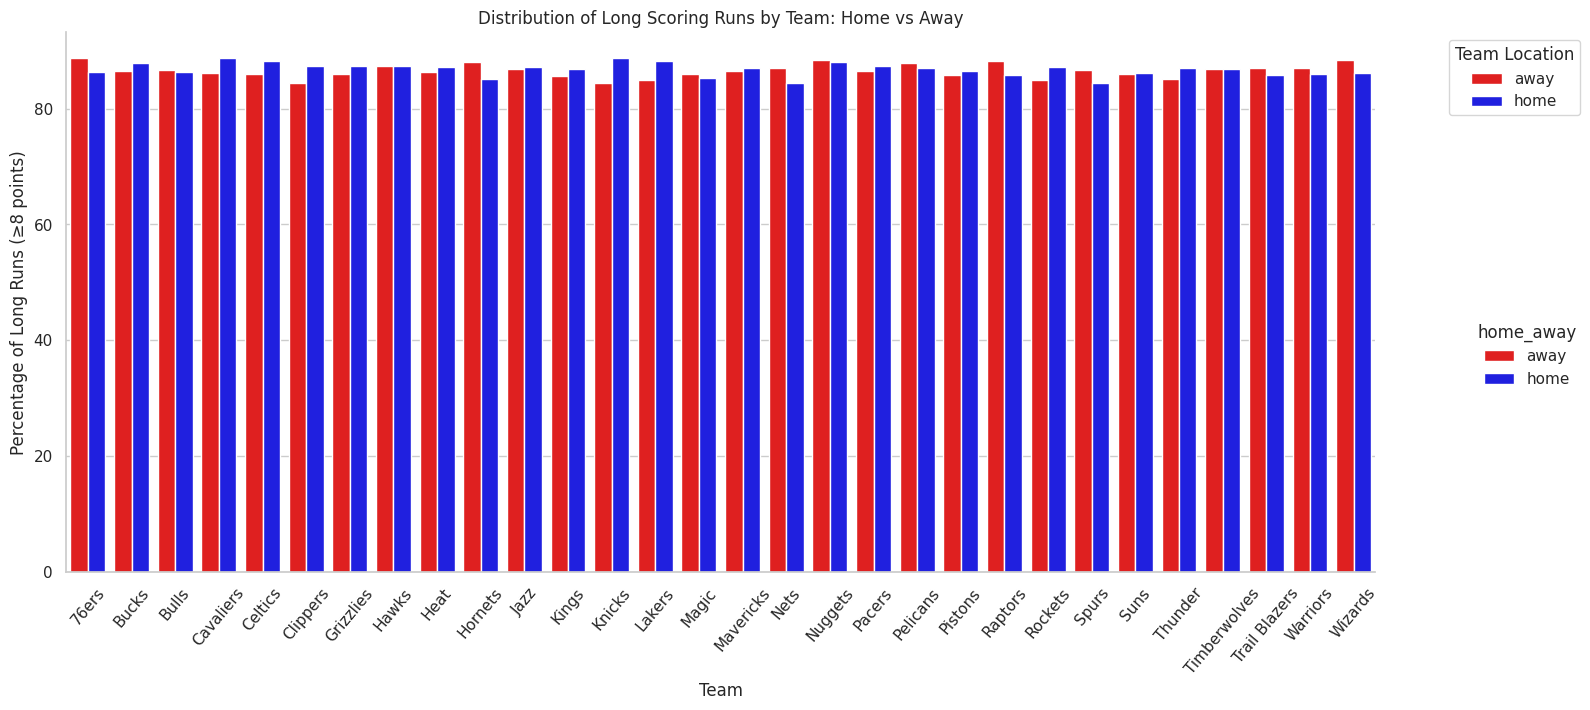

In [167]:
sns.catplot(x='team_name', y='pct_long_runs', hue='home_away', data=long_run_stats, kind='bar', palette = ['red','blue'],height=6.5, aspect=2)
plt.xlabel('Team')
plt.ylabel('Percentage of Long Runs (≥8 points)')
plt.title('Distribution of Long Scoring Runs by Team: Home vs Away')
plt.tight_layout()
plt.xticks(rotation=50)
plt.legend(title="Team Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Each run was marked a "long run" if it reached 8 or more points (no firm number set by NBA so this was based on fan/commentator opinion). Then, calculated the proportion by team location and summarized for the entire league as well as by individual team.


##### **Findings**

*   Throughout the league, home and visiting teams produce long scoring streaks at nearly the same rate.
*   Some teams show greater disparities between home and away performances, indicating unique momentum trends for each team.
*   The overall distribution indicates that significant momentum changes happen consistently across different venues.

#### How are big runs distributed across quarters? - Bill

In [168]:
run_periods = cdn_scoring.groupby(['game_id', 'run_id'])['period'].first().reset_index()
run_periods.rename(columns={'period': 'run_period'}, inplace=True)

runs_stats = runs_stats.drop(columns=['run_period'], errors='ignore')
runs_stats = runs_stats.merge(run_periods, on=['game_id', 'run_id'], how='left')

long_runs_by_period = runs_stats[runs_stats['run_points'] >= 8]
long_run_counts = long_runs_by_period.groupby(['home_away', 'run_period']).aggregate({'run_id':'count'}).reset_index()
long_run_counts['pct_of_long_runs'] = (long_run_counts.groupby('home_away')['run_id'].transform(lambda x: (x / x.sum()) * 100))

long_run_counts = long_run_counts.sort_values('run_period')

period_labels = {1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}
long_run_counts['run_period'] = long_run_counts['run_period'].map(period_labels)

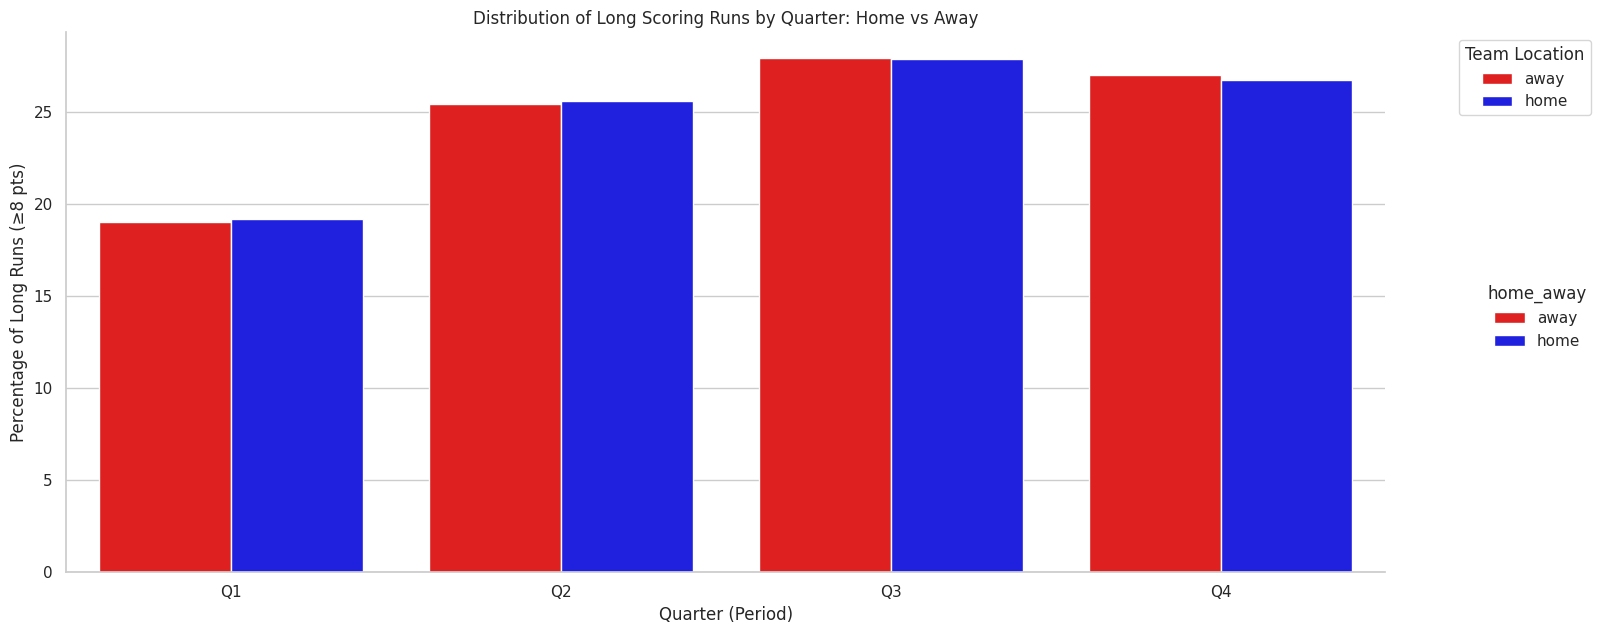

In [169]:
sns.catplot(x='run_period', y='pct_of_long_runs', hue='home_away', data=long_run_counts, kind='bar', palette=['red','blue'],height=6.5, aspect=2)
plt.xlabel('Quarter (Period)')
plt.ylabel('Percentage of Long Runs (≥8 pts)')
plt.title('Distribution of Long Scoring Runs by Quarter: Home vs Away')
plt.tight_layout()
plt.legend(title="Team Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To determine when momentum peaks happen during games, identified the start of each quarter so that we can compare long runs by quarter and understand when in the game they occur the most.

##### **Findings**

*   Throughout the league, home and visiting teams produce long scoring streaks at nearly the same rate.
*   Few long runs occur in the 1st quarter, indicating plays are more balanced early on.
*   Small increases are noticeable in the second and fourth quarters, especially for home teams.
*   Visiting teams have a slight advantage in long runs during the fourth quarter.
*  Reasonable to assume here is not a specific time in the game when momentum usually shifts; it can happen at any point.

#### **Challenges**
For this analysis, the goal was to build a unified dataset thht merged the `matchups` and play by play data (`cdnnba`) in order to accurately identify home and away teams. In early versions of this merge, I created duplicate or missing keys, causing the data to be distorted. To resolve, this required refining conditions of the join and carefully filtering unique game IDs. Additionaly, identifier columns such as `team_name` were originally removed during the cleaning process. I later went back and reintroduced them (making sure it stayed throughout filtering) because it would be important for providing context in visualiztions later.

Translating "momentum" into measurable data was a more complex challenge. Identifying scoring runs required detecting consectuive scoring events by the same team and seperating sequences when possession changed. This was accomplished using .shift() and .cumsum() to reference previous events and generate run identifiers. This also required ensuring that runs didn't cross over between games or periods, and that sorting by ['game_id', 'period', 'actionNumber'] produced correct event sequencing through repeated adjustment/iteration.

Upon examing visualizations, majority of the differences observed between home and away teams were minor, which was difficult to rationalize; intial expectations were that a story would be immediately present. This meant shifting focus; opted instead to look at trends rather than intensity.

Early visualizations were boring, then trying to make it more interested they became cluttered. Intially, the first two visualizations were at the league-level; overall visualizations for home and away were nearly identical and not much insight came from them. Moreover, lack of inconsistent scaling necessitated adjusting figure dimensions and legend placement (among other things) to help improve readability. Charts at the team level were kept selectively, only when they added meaningful insight.


All in all, the main issue was converting concepts into measurable data. Overall going through this process emphasized the importance of organized reasoning and repeated refinement (going to see what you can alter) as well as clear visuals to ensure that even slight results can help enhance a business question/narrative.

### Average Home Scoring Vs. Away Scoring and Percentage of Home Team Wins - Keane

**Question:**

Does the home team tend to score more than the away team and Which side tends to win more?

---

In [170]:
games_scores = nba_cleaned_k.groupby("gameId").agg({
    "scoreHome": "max",
    "scoreAway": "max"
}).reset_index()

matchups = matchups.rename(columns={"game_id": "gameId"})

matchups.drop_duplicates(subset="gameId", inplace=True)

full_games = nba_cleaned_k.merge(matchups[['away_team_id','home_team_id','gameId']], on="gameId", how="left")

full_games["home_team_id"] = full_games["home_team_id"].fillna(0).astype("int64")
full_games["away_team_id"] = full_games["away_team_id"].fillna(0).astype("int64")
full_games["teamId"] = full_games["teamId"].fillna(0).astype("int64")

full_games.head(3)

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,possession,...,jumpBallRecoverdPersonId,playerName,playerNameI,area,areaDetail,shotDistance,shotResult,gameId,away_team_id,home_team_id
0,2,PT12M00.00S,2024-11-13T00:10:24.900Z,1,REGULAR,period,start,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22400001,1610612737,1610612738
1,4,PT11M58.00S,2024-11-13T00:10:26.800Z,1,REGULAR,jumpball,recovered,NaN,1630811,1610612737,...,1630811.0,Wallace,K. Wallace,NaN,NaN,NaN,NaN,22400001,1610612737,1610612738
2,7,PT11M43.00S,2024-11-13T00:10:40Z,1,REGULAR,3pt,Jump Shot,NaN,1642258,1610612737,...,NaN,Risacher,Z. Risacher,Above the Break 3,24+ Left Center,26.51,Missed,22400001,1610612737,1610612738


In [171]:
final_scores = (
    full_games.groupby('gameId')[['scoreHome', 'scoreAway']].max().reset_index()
)


avg_home = final_scores['scoreHome'].mean()
avg_away = final_scores['scoreAway'].mean()
avg_margin = (final_scores['scoreHome'] - final_scores['scoreAway']).mean()

print(f"Final Scores ({len(final_scores)} games)")

print(f"\nMax home score:{final_scores['scoreHome'].max()}")
print(f"Max away score:{final_scores['scoreAway'].max()}")

print(f"\nMin home score:{final_scores['scoreHome'].min()}")
print(f"Min away score:{final_scores['scoreAway'].min()}")

print(f"\nAverage Home Score: {avg_home:.2f}")
print(f"Average Away Score: {avg_away:.2f}")

print(f"\nAverage Margin (Home - Away): {avg_margin:.2f}")

Final Scores (1230 games)

Max home score:155
Max away score:162

Min home score:79
Min away score:67

Average Home Score: 114.64
Average Away Score: 113.01

Average Margin (Home - Away): 1.63


In [172]:
# Average points league-wide
avg_home = final_scores['scoreHome'].mean()
avg_away = final_scores['scoreAway'].mean()

#plt.figure(figsize=(6,6))
#plt.bar(["Home Teams", "Away Teams"], [avg_home, avg_away], color=["blue","red"], alpha=0.7)
#plt.ylabel("Average Points per Game")
#plt.title("Average Home vs Away Scoring (2024-25 Season)")
#plt.show()


Graph moved to Appendix - Cell 2

In [173]:
full_games["margin"] = full_games["scoreHome"] - full_games["scoreAway"]

#plt.figure(figsize=(10,6))
#plt.hist(full_games["margin"], bins=30, color="skyblue", edgecolor="black")
#plt.axvline(0, color="red", linestyle="--")
#plt.xlabel("Home Team Margin (Home - Away)")
#plt.ylabel("Number of Games")
#plt.title("Distribution of Home Team Margins")
#plt.show()

home_win_pct = (full_games["margin"] > 0).mean() * 100
print(f"Home teams won {home_win_pct:.1f}% of games")


Home teams won 50.5% of games


Graph moved to the Appendix - Cell 3

#### Findings

Based on the analysis of Average Home Scoring vs. Away Scoring and percentage of home team wins:

1.   Overall Scoring: On average, home teams score slightly more points per game (114.64) than away teams (113.01), resulting in an average home margin of 1.63 points.
2.   Home Team Margin Distribution: The distribution of home team margins shows a slight skew towards positive values, indicating that home teams tend to win by a small margin more often than they lose by a small margin. Home teams won 50.5% of the games in the dataset.
3.   Average Home vs Away Scoring: Home teams average 114.64 points per game, while away teams average 113.01 points per game.
4.   Home Team Win Percentage: Home teams won 50.5% of the games in the dataset.

#### Challenges

Determine Final Score: The challenge here was figuring out the best way to determine the end of the game to retrieve the final score, to calculate the average final score, and the average margin of deficit.

Win Calculation: I likely couldve created a wins col to see which team won, then do the calculation that was, using the margin was an easier way to do so since it's scorehome - scoreaway. This way, if the margin is > 0, it's a home win. Most games have a winner, so this analysis rules out ties.



### Scoring Runs Length and Average Time in the Lead - Keane

**Question:**

How long does the home team spend in the lead of the game and what are the lengths of the scoring runs that these teams go on?

---

In [174]:
full_games['is_home_action'] = full_games['teamId'] == full_games['home_team_id']
full_games['is_away_action'] = full_games['teamId'] == full_games['away_team_id']

# Calculate deltas (scoring changes)
full_games['home_delta'] = full_games['scoreHome'].diff().fillna(0).clip(lower=0)
full_games['away_delta'] = full_games['scoreAway'].diff().fillna(0).clip(lower=0)

full_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686008 entries, 0 to 686007
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   actionNumber              686008 non-null  int64  
 1   clock                     686008 non-null  object 
 2   timeActual                686008 non-null  object 
 3   period                    686008 non-null  int64  
 4   periodType                686008 non-null  object 
 5   actionType                686008 non-null  object 
 6   subType                   653830 non-null  object 
 7   qualifiers                241363 non-null  object 
 8   personId                  686008 non-null  int64  
 9   possession                686008 non-null  int64  
 10  scoreHome                 686008 non-null  int64  
 11  scoreAway                 686008 non-null  int64  
 12  isFieldGoal               686008 non-null  int64  
 13  side                      219529 non-null  o

In [175]:
full_games['margin'] = full_games['scoreHome'] - full_games['scoreAway']

full_games['home_leading'] = (full_games['margin'] > 0).astype(int)

# % of time leading per quarter per game
lead_stats = (
    full_games.groupby(['gameId', 'period'])['home_leading']
          .mean()
          .reset_index(name='pct_home_leading')
)

In [176]:
season_lead_stats = lead_stats.groupby('period')['pct_home_leading'].mean()
print(season_lead_stats*100)

period
1    47.177389
2    51.004219
3    51.423704
4    52.490197
5    37.675186
6    48.819320
Name: pct_home_leading, dtype: float64

The only time we see the home team lead for a significant portion of the quarter/game is during the 4th quarter which can tell us that the home team usually wins


The only time we see the home team lead for a significant portion of the quarter/game is during the 4th quarter which can tell us that the home team usually wins

In [177]:
#season_lead_stats.plot(kind='bar', title='Avg % of Time Home Team Leading per Quarter')
#plt.ylabel('% of Time Leading')
#plt.show()

Graph moved to Appendix - Cell 5

In [178]:
# Identify who scored each possession
full_games['scoring_team'] = np.select(
    [full_games['home_delta'] > 0, full_games['away_delta'] > 0],
    ['home', 'away'],
    default=None
)

# Group by game to calculate run lengths
def longest_runs(series):
    longest_home = longest_away = current_home = current_away = 0
    for team in series:
        if team == 'home':
            current_home += 1
            current_away = 0
        elif team == 'away':
            current_away += 1
            current_home = 0
        else:
            continue
        longest_home = max(longest_home, current_home)
        longest_away = max(longest_away, current_away)
    return pd.Series({'longest_home_run': longest_home, 'longest_away_run': longest_away})

run_stats = full_games.groupby('gameId')['scoring_team'].apply(longest_runs).reset_index()

In [179]:
run_stats_wide = run_stats.pivot(
    index='gameId',
    columns='level_1',
    values='scoring_team'
).reset_index()

# Rename columns
run_stats_wide.columns.name = None
run_stats_wide = run_stats_wide.rename(columns={
    'longest_home_run': 'longest_home_run',
    'longest_away_run': 'longest_away_run'
})

print(run_stats_wide.max())

gameId              22401230
longest_away_run          14
longest_home_run          12
dtype: int64


In [180]:
print(run_stats_wide[['longest_home_run', 'longest_away_run']].mean())

longest_home_run    5.365041
longest_away_run    5.311382
dtype: float64


In [181]:
#run_stats_wide[['longest_home_run', 'longest_away_run']].plot(kind='box')
#plt.title("Distribution of Longest Scoring Runs per Game")
#plt.ylabel("Consecutive Scoring Events")
#plt.show()

Graph moved to Appendix - Cell 4

#### Findings

1. Average Lead Time: The average percentage of time the home team is leading varies by quarter. They tend to lead for a slightly larger percentage of the time in the later quarters (Q3 and Q4) compared to the earlier ones (Q1 and Q2). This suggests that while home teams might not start strong, they gain an edge as the game progresses.

2. Longest Scoring Runs: The distribution of the longest scoring runs (consecutive scoring events by the same team) is very similar for both home and away teams. The average longest run is around 5.3 events for both. This indicates that the home-court advantage does not significantly impact a team's ability to string together consecutive scoring plays.

In summary, while home teams tend to lead more often in the later stages of the game, their ability to create extended scoring runs is comparable to that of away teams.

#### Challanges

Defining a run:
The challenge here was determining what constituted a scoring run. The scoring run here is defined as consecutive points scored by a team.

Calculation: When I originally calculated the runs, it was done column-wise rather than row-wise, so I had to create a run_wide so that the analysis was conducted correctly.

I could've created a HomeAway column for this portion rather than use the delta's as well, since delta doesn't necessarily = scoring run/consecutive points.

Home leading: Another challenge was finding a way to create the home leading stat.

### Turnover Differential at Home vs Away - Keane

**Question:**

Do turnovers occur less often when home?

---

/tmp/ipython-input-4030501584.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


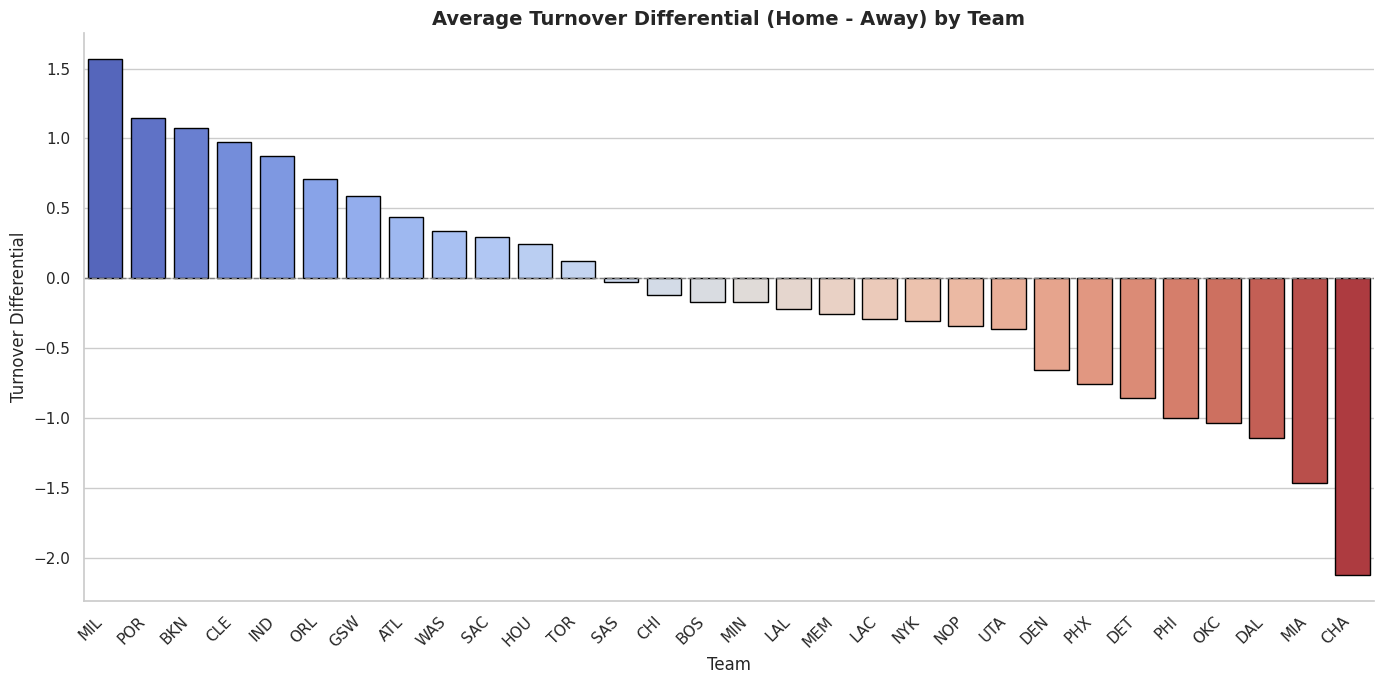

In [182]:
turnovers = full_games[full_games['actionType'] == 'turnover'].copy()

turnovers["HomeAway"] = np.where(
    turnovers["teamId"] == turnovers["home_team_id"], "Home",
    np.where(turnovers["teamId"] == turnovers["away_team_id"], "Away", None)
)

team_map = turnovers[["teamId", "teamTricode"]].drop_duplicates()

turnover_counts = (
    turnovers.groupby(["gameId", "teamId", "HomeAway"])
    .size()
    .reset_index(name="turnover_count")
)

team_turnover_diff = (
    turnover_counts.pivot_table(
        index="teamId",
        columns="HomeAway",
        values="turnover_count",
        aggfunc="mean"
    )
    .reset_index()
)

team_turnover_diff["turnover_diff"] = (
    team_turnover_diff["Home"] - team_turnover_diff["Away"]
)


team_turnover_diff = team_turnover_diff.merge(team_map, on="teamId", how="left")
team_turnover_diff = team_turnover_diff.sort_values("turnover_diff", ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(
    data=team_turnover_diff,
    x="teamTricode",
    y="turnover_diff",
    palette="coolwarm",
    edgecolor="black"
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Average Turnover Differential (Home - Away) by Team", fontsize=14, fontweight="bold")
plt.xlabel("Team")
plt.ylabel("Turnover Differential")
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.show()


Positive means that more turnovers are committed at home

Negative means that fewer turnovers are committed at home

#### Findings

Turnover Differential: The turnover differential (average turnovers committed by home teams minus average turnovers committed by away teams) varies by team. Some teams tend to commit more turnovers at home compared to on the road, while others commit fewer.

These findings suggest that while there is a slight home-court advantage, it doesn't drastically alter the ability to consistently reduce turnovers across all teams. The advantage appears to be subtle and can vary by team and game Situation.

We were also able to see that CHA performs much better at home than any other team

**Answer:**

It depends

#### Challanges
Defining a Turnover: What constitutes a turnover can sometimes be ambiguous in the raw data. Ensuring a consistent definition across all games and actions is crucial. The definition we used was anything with the ActionType == 'turnover'

Game Context: A high number of turnovers might not always indicate poor performance. A team playing at a high pace might have more turnovers but still be effective offensively. The context of the game (score differential, time remaining, opponent's defensive strategy) is important.

Cause and Effect: It's challenging to determine if a turnover is a result of a The team's own mistakes or excellent defense by the opponent. This could be a steal or a well placed block that turns into a charging foul etc.

## Conclusion - Final

---

**Conclusion:**

The traditional notion of "home-court advantage" is supported by the data, primarily reflected in slightly better shooting efficiency at the rim and from three-point range, and a marginal increase in average scoring and win percentage for home teams. However, this advantage does not appear to fundamentally alter team strategies regarding shot selection, substitution patterns, or the ability to generate scoring runs. The influence of venue seems to be subtle, providing a small edge rather than a drastic shift in performance or strategy.

**Recommendations:**

*   Teams should continue to prioritize high-efficiency shots like layups and strategically utilize three-pointers, as these are key drivers of offensive success regardless of venue.
*   Coaching staffs can use the predictable substitution patterns to inform opponent scouting and potentially optimize player rest and rotation.
*   While home-court advantage offers a slight boost, teams should focus on developing consistent performance and adaptability that can travel, as evidenced by teams with balanced home and away win rates.
*   Further analysis could explore the impact of crowd noise, referee bias, and travel fatigue to better isolate the factors contributing to the observed home-court advantage.

## GenAI Disclosure

---

**References:**

KAGGLE - https://www.kaggle.com/datasets/brains14482/nba-playbyplay-and-shotdetails-data-19962021?select=matchups_2024.csv

**GenAI Disclosure:**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

Content Generation: We used ChatGPT to brainstorm ideas and structure the initial outline of the project. Chat helped us come up with the initial idea and we were able to then generate our own questions based on our intrest in the field.

Research Assistance: ChatGPT was used to help us better understand how to go about certain questions. Some questions were harder to conceptilize than others so ChatGPT helped us understand which part of the data we might need to have if we wanted to answer complex questions as well as understand and integrate complex concepts.

Code Review and Debugging: Google Gemini and ChatGPT suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.
Google Gemini and ChatGPT were also used to debug if an error occurred (depending on the error).

Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy. Had to use the Grammarly plugin to work seamlessly with the text cell. We also used ChatGPT to refine our summaries to correct for grammar, punctuation, and flow.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.


## Appendix - 5

Here, we have extra graphs that we created!

---

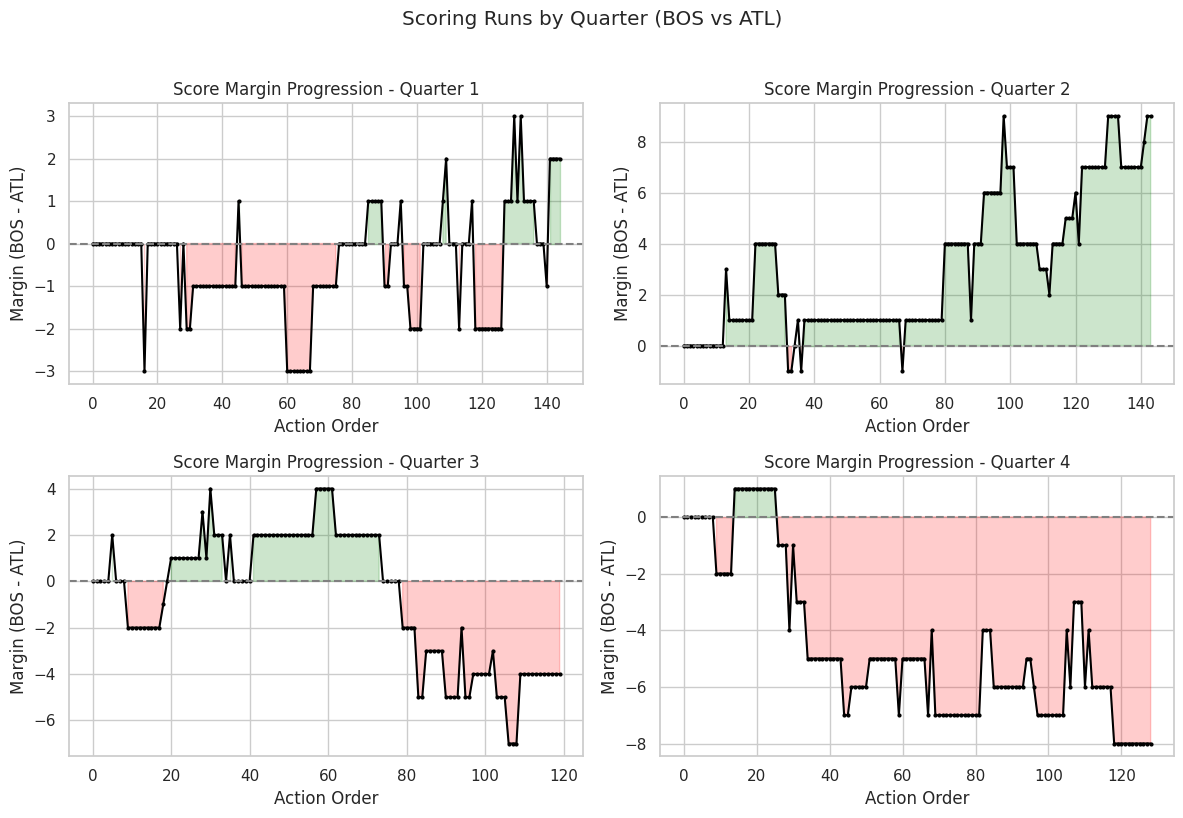

In [183]:
#Keane

def plot_quarter_margins(df, home_team="BOS", away_team="ATL"):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for q in range(1, 5):
        # Filter for the current quarter
        qdf = df[df["period"] == q].copy().reset_index(drop=True)

        # Ensure we have a sequential x-axis
        qdf["action_order"] = qdf.index

        # Compute the quarter margin directly
        qdf["margin_q"] = (qdf["scoreHome"] - qdf["scoreHome"].iloc[0]) - \
                          (qdf["scoreAway"] - qdf["scoreAway"].iloc[0])

        ax = axes[q-1]

        # Plot the margin line
        ax.plot(qdf["action_order"], qdf["margin_q"], marker="o", markersize=2, color="black")
        ax.axhline(0, color="gray", linestyle="--")

        # Add shading: green for positive, red for negative
        ax.fill_between(qdf["action_order"], 0, qdf["margin_q"],
                        where=(qdf["margin_q"] > 0),
                        color="green", alpha=0.2)
        ax.fill_between(qdf["action_order"], 0, qdf["margin_q"],
                        where=(qdf["margin_q"] < 0),
                        color="red", alpha=0.2)

        # Titles and labels
        ax.set_title(f"Score Margin Progression - Quarter {q}")
        ax.set_xlabel("Action Order")
        ax.set_ylabel(f"Margin ({home_team} - {away_team})")

    fig.suptitle(f"Scoring Runs by Quarter ({home_team} vs {away_team})", y=1.02)
    plt.tight_layout()
    plt.show()


plot_quarter_margins(nba_cleaned_1, home_team="BOS", away_team="ATL")

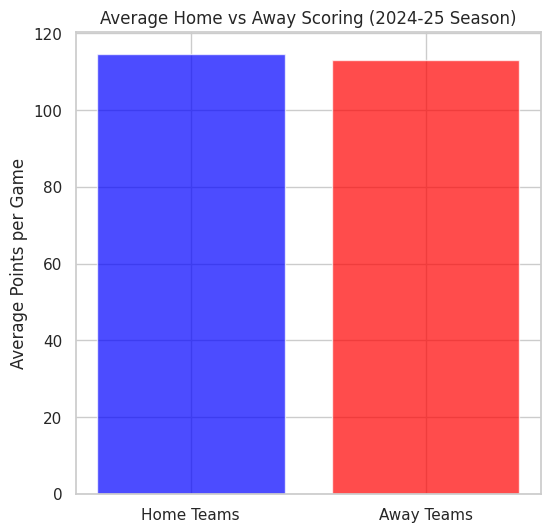

In [184]:
#Keane

# Average points league-wide
avg_home = final_scores['scoreHome'].mean()
avg_away = final_scores['scoreAway'].mean()

plt.figure(figsize=(6,6))
plt.bar(["Home Teams", "Away Teams"], [avg_home, avg_away], color=["blue","red"], alpha=0.7)
plt.ylabel("Average Points per Game")
plt.title("Average Home vs Away Scoring (2024-25 Season)")
plt.show()

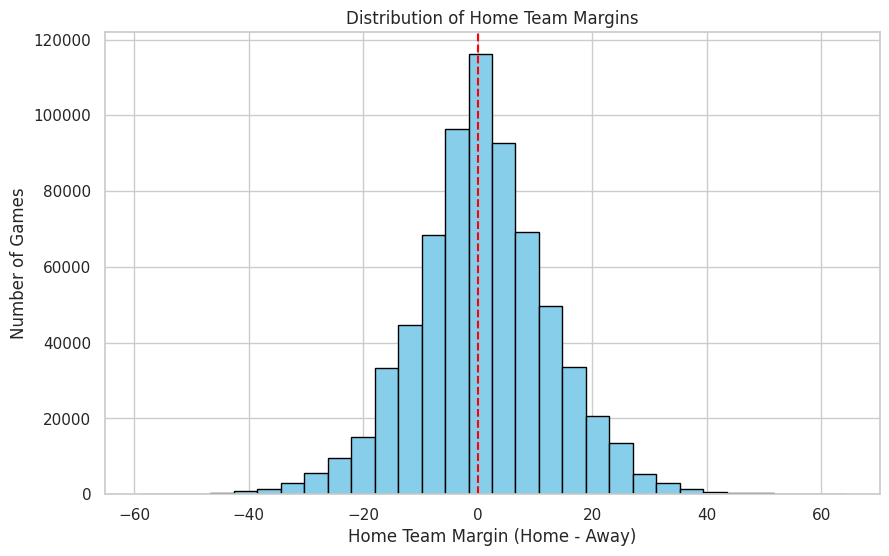

In [185]:
#Keane

full_games["margin"] = full_games["scoreHome"] - full_games["scoreAway"]

plt.figure(figsize=(10,6))
plt.hist(full_games["margin"], bins=30, color="skyblue", edgecolor="black")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Home Team Margin (Home - Away)")
plt.ylabel("Number of Games")
plt.title("Distribution of Home Team Margins")
plt.show()

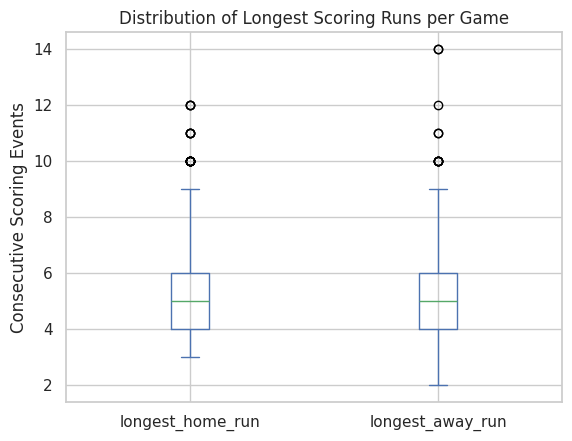

In [186]:
#Keane

run_stats_wide[['longest_home_run', 'longest_away_run']].plot(kind='box')
plt.title("Distribution of Longest Scoring Runs per Game")
plt.ylabel("Consecutive Scoring Events")
plt.show()

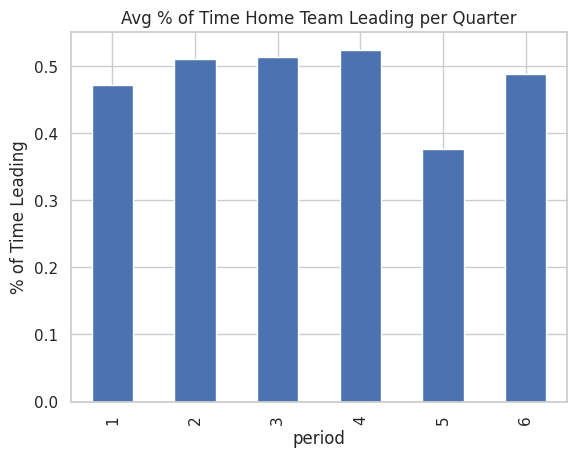

In [187]:
#Keane

season_lead_stats.plot(kind='bar', title='Avg % of Time Home Team Leading per Quarter')
plt.ylabel('% of Time Leading')
plt.show()